# Analyse du rapport du bien-être sur terre.

In [1]:
#Importation de packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
# Pour les tests statistiques
from scipy.stats import spearmanr
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

## Exploration des données

In [2]:
#importer le jeu de données du 2005 à 2020. Et 2021

df = pd.read_csv("Fichier_de_base.csv")
df_21 =pd.read_csv("Fichier_2021.csv")

### Etape 1/ comprendre les données

In [3]:
df.head(10) #Affichage des 10 première lignes du jeu de données

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258
1,Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237
2,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
3,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
4,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268
5,Afghanistan,2013,3.572,7.725,0.484,52.56,0.578,0.061,0.823,0.621,0.273
6,Afghanistan,2014,3.131,7.718,0.526,52.88,0.509,0.104,0.871,0.532,0.375
7,Afghanistan,2015,3.983,7.702,0.529,53.20,0.389,0.080,0.881,0.554,0.339
8,Afghanistan,2016,4.220,7.697,0.559,53.00,0.523,0.042,0.793,0.565,0.348
9,Afghanistan,2017,2.662,7.697,0.491,52.80,0.427,-0.121,0.954,0.496,0.371


In [4]:
df.info()#affichage des informations sur nos variables

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1949 entries, 0 to 1948
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country name                      1949 non-null   object 
 1   year                              1949 non-null   int64  
 2   Life Ladder                       1949 non-null   float64
 3   Log GDP per capita                1913 non-null   float64
 4   Social support                    1936 non-null   float64
 5   Healthy life expectancy at birth  1894 non-null   float64
 6   Freedom to make life choices      1917 non-null   float64
 7   Generosity                        1860 non-null   float64
 8   Perceptions of corruption         1839 non-null   float64
 9   Positive affect                   1927 non-null   float64
 10  Negative affect                   1933 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 167.6+ KB


In [5]:
df.describe() # Résumé statistique des variables numériques

,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
count,1949.000000,1949.000000,1913.000000,1936.000000,1894.000000,1917.000000,1860.000000,1839.000000,1927.000000,1933.000000
mean,2013.216008,5.466705,9.368453,0.812552,63.359374,0.742558,0.000103,0.747125,0.710003,0.268544
std,4.166828,1.115711,1.154084,0.118482,7.510245,0.142093,0.162215,0.186789,0.107100,0.085168
min,2005.000000,2.375000,6.635000,0.290000,32.300000,0.258000,-0.335000,0.035000,0.322000,0.083000
25%,2010.000000,4.640000,8.464000,0.749750,58.685000,0.647000,-0.113000,0.690000,0.625500,0.206000
50%,2013.000000,5.386000,9.460000,0.835500,65.200000,0.763000,-0.025500,0.802000,0.722000,0.258000
75%,2017.000000,6.283000,10.353000,0.905000,68.590000,0.856000,0.091000,0.872000,0.799000,0.320000
max,2020.000000,8.019000,11.648000,0.987000,77.100000,0.985000,0.698000,0.983000,0.944000,0.705000


In [6]:
df.isna().sum() #affichage des valeurs manquantes pour chaque variable

Country name                          0
year                                  0
Life Ladder                           0
Log GDP per capita                   36
Social support                       13
Healthy life expectancy at birth     55
Freedom to make life choices         32
Generosity                           89
Perceptions of corruption           110
Positive affect                      22
Negative affect                      16
dtype: int64

### Identifier les valeurs uniques dans les colonnes catégorielles :

In [7]:
df["year"].unique () #voir sur combien d'années l'étude a été menée

array([2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018,
       2019, 2007, 2020, 2006, 2005], dtype=int64)

In [8]:
df.sort_values(by = "year", ascending = True ,inplace = True ) # On ordonne les années

### Récupération de la classification des pays par région du dataset 2021.

In [9]:
# Définir l'option pour afficher toutes les lignes
pd.set_option("display.max_rows", None)

# Afficher les colonnes "Country name" et "Regional indicator"
print(df_21[["Country name", "Regional indicator"]])

                  Country name                  Regional indicator
0                      Finland                      Western Europe
1                      Denmark                      Western Europe
2                  Switzerland                      Western Europe
3                      Iceland                      Western Europe
4                  Netherlands                      Western Europe
5                       Norway                      Western Europe
6                       Sweden                      Western Europe
7                   Luxembourg                      Western Europe
8                  New Zealand               North America and ANZ
9                      Austria                      Western Europe
10                   Australia               North America and ANZ
11                      Israel        Middle East and North Africa
12                     Germany                      Western Europe
13                      Canada               North America and

### Adjonction de la variable région pour notre dataset

In [10]:
def get_regional_indicator(country_name):
    # Dictionnaire de correspondance des pays avec leur région
    country_to_region = {
        "Denmark": "Western Europe",
        "France": "Western Europe",
        "Mexico": "Latin America and Caribbean",
        "Germany": "Western Europe",
        "Poland": "Central and Eastern Europe",
        "Spain": "Western Europe",
        "Greece": "Western Europe",
        "Brazil": "Latin America and Caribbean",
        "Sweden": "Western Europe",
        "Egypt": "Middle East and North Africa",
        "Saudi Arabia": "Middle East and North Africa",
        "Lebanon": "Middle East and North Africa",
        "Netherlands": "Western Europe",
        "Australia": "Australia and New Zealand",
        "United Kingdom": "Western Europe",
        "Canada": "North America",
        "Iran": "Middle East and North Africa",
        "Pakistan": "South Asia",
        "Hungary": "Central and Eastern Europe",
        "Czech Republic": "Central and Eastern Europe",
        "Belgium": "Western Europe",
        "Turkey": "Middle East and North Africa",
        "Jordan": "Middle East and North Africa",
        "Venezuela": "Latin America and Caribbean",
        "Italy": "Western Europe",
        "Japan": "East Asia",
        "Romania": "Central and Eastern Europe",
        "Portugal": "Western Europe",
        "Singapore": "Southeast Asia",
        "Sierra Leone": "Sub-Saharan Africa",
        "Rwanda": "Sub-Saharan Africa",
        "Chile": "Latin America and Caribbean",
        "Senegal": "Sub-Saharan Africa",
        "Russia": "Commonwealth of Independent States",
        "Colombia": "Latin America and Caribbean",
        "Chad": "Sub-Saharan Africa",
        "China": "East Asia",
        "South Korea": "East Asia",
        "Slovenia": "Central and Eastern Europe",
        "Uganda": "Sub-Saharan Africa",
        "Belarus": "Commonwealth of Independent States",
        "Trinidad and Tobago": "Latin America and Caribbean",
        "Togo": "Sub-Saharan Africa",
        "Benin": "Sub-Saharan Africa",
        "Thailand": "Southeast Asia",
        "Tanzania": "Sub-Saharan Africa",
        "Bolivia": "Latin America and Caribbean",
        "Tajikistan": "Commonwealth of Independent States",
        "Taiwan Province of China": "East Asia",
        "Switzerland": "Western Europe",
        "Botswana": "Sub-Saharan Africa",
        "Sri Lanka": "South Asia",
        "Burkina Faso": "Sub-Saharan Africa",
        "Cambodia": "Southeast Asia",
        "South Africa": "Sub-Saharan Africa",
        "Cameroon": "Sub-Saharan Africa",
        "Slovakia": "Central and Eastern Europe",
        "Philippines": "Southeast Asia",
        "Costa Rica": "Latin America and Caribbean",
        "Cuba": "Latin America and Caribbean",
        "Malawi": "Sub-Saharan Africa",
        "Madagascar": "Sub-Saharan Africa",
        "Guatemala": "Latin America and Caribbean",
        "Lithuania": "Central and Eastern Europe",
        "Haiti": "Latin America and Caribbean",
        "Latvia": "Central and Eastern Europe",
        "Honduras": "Latin America and Caribbean",
        "Malaysia": "Southeast Asia",
        "Laos": "Southeast Asia",
        "Kyrgyzstan": "Commonwealth of Independent States",
        "Kuwait": "Middle East and North Africa",
        "Kenya": "Sub-Saharan Africa",
        "India": "South Asia",
        "Kazakhstan": "Commonwealth of Independent States",
        "Indonesia": "Southeast Asia",
        "Jamaica": "Latin America and Caribbean",
        "Ireland": "Western Europe",
        "Hong Kong S.A.R. of China": "East Asia",
        "Ghana": "Sub-Saharan Africa",
        "Mali": "Sub-Saharan Africa",
        "Georgia": "Commonwealth of Independent States",
        "Cyprus": "Middle East and North Africa",
        "Paraguay": "Latin America and Caribbean",
        "Panama": "Latin America and Caribbean",
        "Palestinian Territories": "Middle East and North Africa",
        "Bangladesh": "South Asia",
        "Dominican Republic": "Latin America and Caribbean",
        "Norway": "Western Europe",
        "Ecuador": "Latin America and Caribbean",
        "Nigeria": "Sub-Saharan Africa",
        "Niger": "Sub-Saharan Africa",
        "Nicaragua": "Latin America and Caribbean",
        "El Salvador": "Latin America and Caribbean",
        "New Zealand": "Australia and New Zealand",
        "Estonia": "Central and Eastern Europe",
        "Nepal": "South Asia",
        "Mozambique": "Sub-Saharan Africa",
        "Finland": "Western Europe",
        "Moldova": "Commonwealth of Independent States",
        "Peru": "Latin America and Caribbean",
        "Ukraine": "Commonwealth of Independent States",
        "Israel": "Middle East and North Africa",
        "Azerbaijan": "Commonwealth of Independent States",
        "Vietnam": "Southeast Asia",
        "Uruguay": "Latin America and Caribbean",
        "Zimbabwe": "Sub-Saharan Africa",
        "Armenia": "Commonwealth of Independent States",
        "Austria": "Western Europe",
        "Argentina": "Latin America and Caribbean",
        "United States": "North America",
        "Zambia": "Sub-Saharan Africa",
        "United Arab Emirates": "Middle East and North Africa",
        "Uzbekistan": "Commonwealth of Independent States",
        "Liberia": "Sub-Saharan Africa",
        "Bosnia and Herzegovina": "Central and Eastern Europe",
        "Montenegro": "Central and Eastern Europe",
        "Croatia": "Central and Eastern Europe",
        "Central African Republic": "Sub-Saharan Africa",
        "Mongolia": "East Asia",
        "Bulgaria": "Central and Eastern Europe",
        "Albania": "Central and Eastern Europe",
        "Mauritania": "Sub-Saharan Africa",
        "Yemen": "Middle East and North Africa",
        "Kosovo": "Central and Eastern Europe",
        "Serbia": "Central and Eastern Europe",
        "North Macedonia": "Central and Eastern Europe",
        "Belize": "Latin America and Caribbean",
        "Guyana": "Latin America and Caribbean",
        "Namibia": "Sub-Saharan Africa",
        "Afghanistan": "South Asia",
        "Djibouti": "Sub-Saharan Africa",
        "Congo (Brazzaville)": "Sub-Saharan Africa",
        "Iceland": "Western Europe",
        "Iraq": "Middle East and North Africa",
        "Syria": "Middle East and North Africa",
        "Burundi": "Sub-Saharan Africa",
        "Congo (Kinshasa)": "Sub-Saharan Africa",
        "Qatar": "Middle East and North Africa",
        "Ivory Coast": "Sub-Saharan Africa",
        "Tunisia": "Middle East and North Africa",
        "Turkmenistan": "Commonwealth of Independent States",
        "Comoros": "Sub-Saharan Africa",
        "Bahrain": "Middle East and North Africa",
        "Somaliland region": "Sub-Saharan Africa",
        "Luxembourg": "Western Europe",
        "Malta": "Western Europe",
        "Sudan": "Sub-Saharan Africa",
        "Algeria": "Middle East and North Africa",
        "Morocco": "Middle East and North Africa",
        "Swaziland": "Sub-Saharan Africa",
        "Guinea": "Sub-Saharan Africa",
        "Lesotho": "Sub-Saharan Africa",
        "Oman": "Middle East and North Africa",
        "Angola": "Sub-Saharan Africa",
        "Gabon": "Sub-Saharan Africa",
        "Mauritius": "Sub-Saharan Africa",
        "Myanmar": "Southeast Asia",
        "North Cyprus": "Western Europe",
        "Suriname": "Latin America and Caribbean",
        "Libya": "Middle East and North Africa",
        "Ethiopia": "Sub-Saharan Africa",
        "Bhutan": "South Asia",
        "Somalia": "Sub-Saharan Africa",
        "South Sudan": "Sub-Saharan Africa",
        "Gambia": "Sub-Saharan Africa",
        "Maldives": "South Asia"
    }

    # Recherche le pays dans le dictionnaire
    if country_name in country_to_region:
        return country_to_region[country_name]
    else:
        return "Unknown"

# Ajouter une colonne "Regional indicator" dans le DataFrame
df["Regional indicator"] = df["Country name"].apply(get_regional_indicator)


In [11]:
print("Les valeurs manquantes pour la variable 'Regional indicator' =  ", df["Regional indicator"].isna().sum())

Les valeurs manquantes pour la variable 'Regional indicator' =   0


### Adjonction la variable température

In [12]:
df2 = pd.read_csv('climate_change_indicators.csv', sep=";")

df_a_renamed = df2.rename(columns={'NMGB': 'Country name', 'Year': 'year'})
df = pd.merge(df, df_a_renamed[['Country name', 'year', 'Temperature']], on=['Country name', 'year'], how='left')
df.head()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Regional indicator,Temperature
0,Denmark,2005,8.019,10.851,0.972,69.6,0.971,NaN,0.237,0.860,0.154,Western Europe,1.282
1,France,2005,7.093,10.642,0.940,71.3,0.895,NaN,0.688,0.769,0.225,Western Europe,1.020
2,Mexico,2005,6.581,9.788,0.903,66.2,0.814,NaN,0.764,0.820,0.219,Latin America and Caribbean,0.806
3,Germany,2005,6.620,10.689,0.963,70.2,0.847,NaN,0.781,0.776,0.197,Western Europe,1.025
4,Poland,2005,5.587,9.849,0.922,66.3,0.782,NaN,0.983,0.715,0.282,Central and Eastern Europe,0.881


In [13]:
print ("Les valeur manquantes pour la variable 'Temperature'  =", df["Temperature"].isna().sum())

Les valeur manquantes pour la variable 'Temperature'  = 110


In [14]:
ratio_val_manquantes = df.isnull().sum()/len (df)*100
ratio_val_manquantes_arrondies = round(ratio_val_manquantes, 2)
print(ratio_val_manquantes_arrondies)

Country name                        0.00
year                                0.00
Life Ladder                         0.00
Log GDP per capita                  1.85
Social support                      0.67
Healthy life expectancy at birth    2.82
Freedom to make life choices        1.64
Generosity                          4.57
Perceptions of corruption           5.64
Positive affect                     1.13
Negative affect                     0.82
Regional indicator                  0.00
Temperature                         5.64
dtype: float64


## Etape 2/ Exploration et analyse des données avec DataViz

A- Un histogramme nous permettra de voir la distribution du score de bonheur parmi les différents pays.

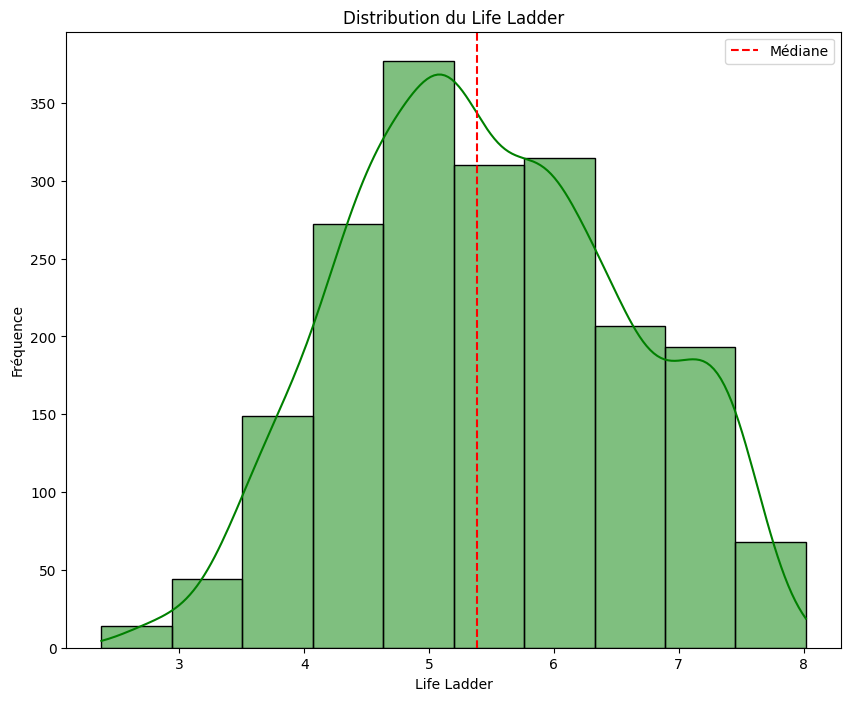

In [15]:
# Créer le displot avec seaborn
plt.figure(figsize=(10, 8))
sns.histplot(df["Life Ladder"], kde=True, bins=10, color="g", edgecolor="black")
plt.title("Distribution du Life Ladder")
plt.xlabel("Life Ladder")
plt.ylabel("Fréquence")

# Calculer la médiane
median_value = df["Life Ladder"].median()

# Ajouter la ligne de médiane
plt.axvline(x=median_value, color="red", linestyle="--", label="Médiane")

# Afficher le graphique avec la légende
plt.legend()
plt.show()

In [16]:
#Commentaire
# - Le graphe montre la fréquence des différents scores de bonheur sur une échelle de 0 à 8, où 0 représente
#le moins heureux et 8 le plus heureux.

# - La forme du graphe est asymétrique, avec une queue plus longue vers la gauche.
#Cela indique qu’il y a plus de gens qui ont un score de bonheur inférieur à la moyenne que supérieur à la moyenne.

B- Boxplot du score du bonheur par années

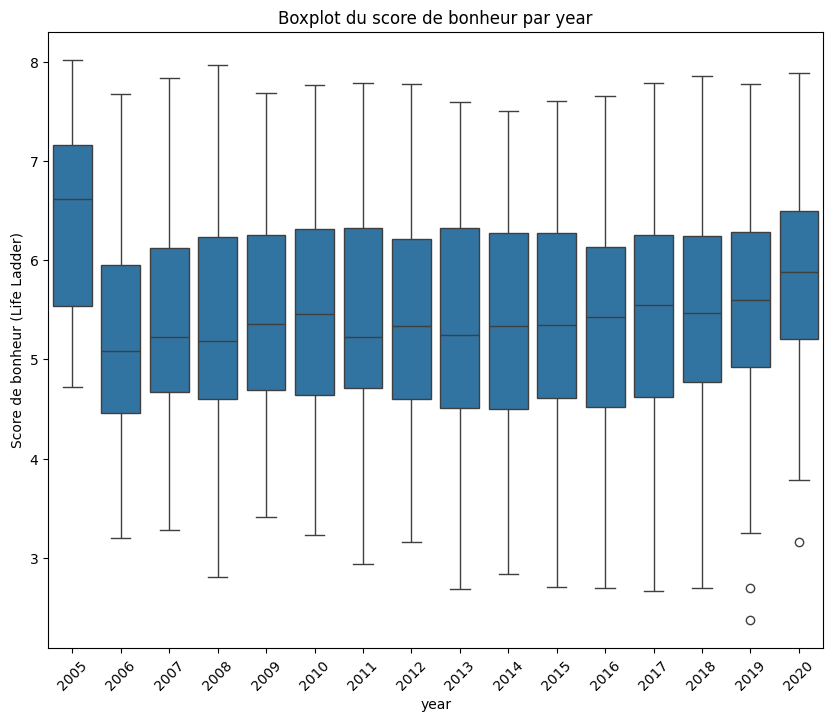

In [17]:
# Sélectionner les variables catégorielles
variables_catégorielles = [ "year"]

# Tracer des boxplots pour chaque variable catégorielle
for variable in variables_catégorielles:
    plt.figure(figsize=(10, 8))
    sns.boxplot(x=variable, y="Life Ladder", data=df)
    plt.title(f"Boxplot du score de bonheur par {variable}")
    plt.xlabel(variable)
    plt.ylabel("Score de bonheur (Life Ladder)")
    plt.xticks(rotation=45)
    plt.show()

In [18]:
# Interprétation :
#1) Les scores de bonheur semblent avoir augmenté au fil des années, avec une légère variation d’une année à l’autre.
# 2) La médiane (ligne au milieu de chaque boîte) semble également augmenter progressivement.
# 3) Les valeurs aberrantes en 2020 pourraient être dues à des circonstances exceptionnelles (comme la pandémie de COVID-19).

C- Analyse du boxenplot du facture du score du bonheur par région

C:\Users\yacin\AppData\Local\Temp\ipykernel_58032\1150225768.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x="Life Ladder", y="Regional indicator", data = df, palette = "viridis")


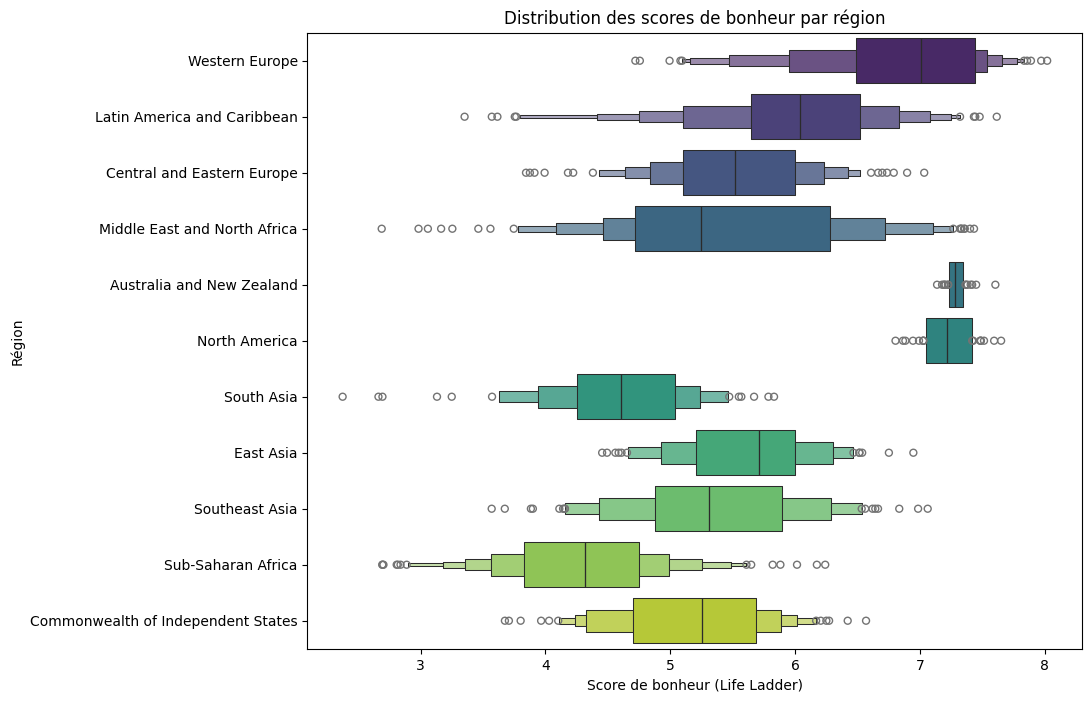

In [19]:
# Créer le boxenplot avec seaborn
plt.figure(figsize=(10, 8))
sns.boxenplot(x="Life Ladder", y="Regional indicator", data = df, palette = "viridis")
plt.title("Distribution des scores de bonheur par région")
plt.xlabel("Score de bonheur (Life Ladder)")
plt.ylabel("Région")

plt.show();


In [20]:
# - Pour l’Australie et la Nouvelle-Zélande, on peut dire :
#Cette région a le score de bonheur moyen le plus élevé, avec environ 5,2. Son boite à moustache est étroit et symétrique,
#ce qui signifie que les scores de bonheur sont peu dispersés et proches de la moyenne.
#Il n’y a pas de valeurs aberrantes, ce qui signifie que tous les pays de cette région ont un niveau de bonheur similaire.

# - Pour l’Afrique subsaharienne, on peut dire :
# Cette région a le score de bonheur moyen le plus bas, avec environ 4,1. Son boite à moustache est large et asymétrique,
#ce qui signifie que les scores de bonheur sont très dispersés et plus faibles que la moyenne.
#Il y a plusieurs valeurs aberrantes, ce qui signifie que certains pays de cette région ont un niveau de bonheur très différent
#des autres.

# - Pour l’Europe occidentale, on peut dire :
# Cette région a un score de bonheur moyen élevé, avec environ 5,1.
#Son boite à moustache est étroit et légèrement asymétrique,
#ce qui signifie que les scores de bonheur sont peu dispersés et légèrement supérieurs à la moyenne.
#Il y a quelques valeurs aberrantes, ce qui signifie que certains pays de cette région ont un niveau de bonheur plus bas ou plus haut que les autres.

D- Affichage de la matrice de correlation des variables numériques

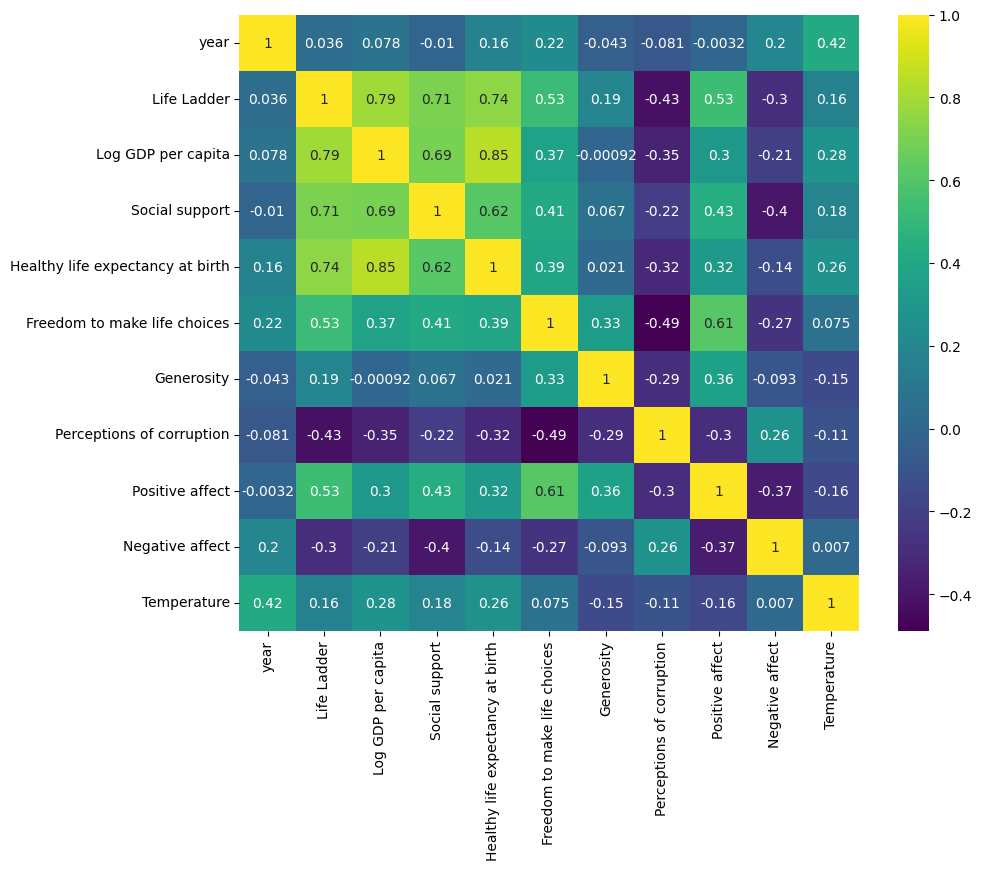

In [21]:
#Affichage de la matrice de corrélation par heatmap
df_base_numeric = df.select_dtypes(include=['float64', 'int64'])

# Calcul de la matrice de corrélation
corr_matrix = df_base_numeric.corr()

# Création de la heatmap avec seaborn
plt.figure(figsize=(10,8))
sns.heatmap(data=corr_matrix, annot=True,cmap='viridis')
plt.show()

In [22]:
# - Le coefficient entre “Life Ladder” et “Log GDP per capita” est de 0,79,
# ce qui signifie qu’il y a une corrélation positive forte entre ces deux variables.
# Cela implique que plus le produit intérieur brut par habitant est élevé, plus le score de bonheur est élevé, et vice versa.

# - Le coefficient entre “Freedom to make life choices” et “Perceptions of corruption” est de -0,44,
#ce qui signifie qu’il y a une corrélation négative modérée entre ces deux variables.
#Cela implique que plus la liberté de choix est élevée, plus la perception de la corruption est faible, et vice versa.

# - Le coefficient entre “Generosity” et “Log GDP per capita” est de 0,000092,
#ce qui signifie qu’il n’y a pratiquement pas de corrélation entre ces deux variables.
#Cela implique que le niveau de générosité n’est pas lié au niveau de richesse, et qu’il peut varier indépendamment.

In [23]:
import plotly.express as px

# Tracer le nuage de points interactif avec Plotly Express
fig = px.scatter(df,
                 x="Log GDP per capita",
                 y="Life Ladder",
                 animation_frame="year",
                 animation_group="Country name",

                 color="Social support",
                 hover_name="Country name",
                 size_max=200,
                 template="plotly_white")

# Mettre à jour le titre du graphique
fig.update_layout(title="comparaison de Life Ladder and Log GDP per capita par country name pour chaque années")

# Afficher le graphique
fig.show()

In [24]:
fig = px.choropleth(df.sort_values("year"),
                   locations="Country name",
                   color="Life Ladder",
                   locationmode="country names",
                   animation_frame="year")
fig.update_layout(title="Life Ladder Comparison par Countries")
fig.show()

### Analyse du facteur économique

1) choix de variable :

- Log PIB par habitant (PIB par habitant) :
Mesure la richesse économique moyenne d’un pays.
Reflète le niveau de développement économique d’une nation.
Un PIB par habitant élevé est souvent associé à une économie prospère et à un niveau de vie plus élevé pour les citoyens.

- Soutien social :
Bien que plus directement liée au bien-être social, une forte perception de soutien social est souvent corrélée avec une économie robuste.
Les économies prospères peuvent offrir des filets de sécurité sociale plus solides et des infrastructures sociales mieux développées, contribuant ainsi au bien-être économique et social des individus.

- Espérance de vie en bonne santé à la naissance :
Bien que liée à la santé, l’espérance de vie en bonne santé est également influencée par des facteurs économiques tels que l’accès aux soins de santé et les conditions de vie.
Une économie forte peut investir dans des systèmes de santé robustes, améliorant ainsi la santé globale de la population et contribuant au bonheur et au bien-être économique.

A- Comparaison par niveau de développement économique :

C:\Users\yacin\AppData\Local\Temp\ipykernel_58032\461920882.py:10: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




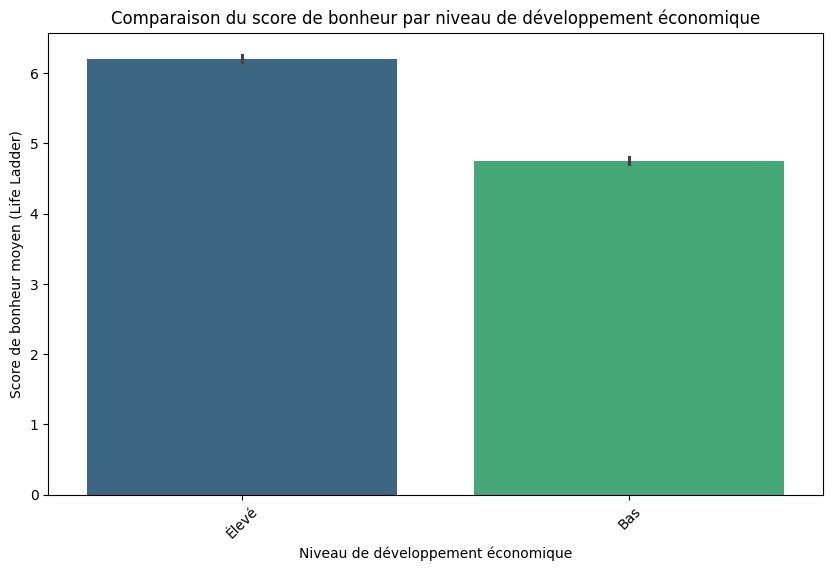

In [25]:
# Définir les catégories de développement économique
def economic_category(gdp):
    if gdp >= df['Log GDP per capita'].median():
        return 'Élevé'
    else:
        return 'Bas'

# Appliquer la fonction directement lors de la création du graphique
plt.figure(figsize=(10, 6))
sns.barplot(x=df['Log GDP per capita'].apply(economic_category), y='Life Ladder', data=df, palette="viridis")
plt.title('Comparaison du score de bonheur par niveau de développement économique')
plt.xlabel('Niveau de développement économique')
plt.ylabel('Score de bonheur moyen (Life Ladder)')
plt.xticks(rotation=45)
plt.show()


In [26]:
# Ce graphique montre que le niveau de développement économique a une influence positive sur le score moyen de bonheur .
#Les pays avec un niveau de développement économique élevé ont un score de bonheur plus élevé que ceux avec un niveau bas.

Le but de ce graphique est de visualiser l’impact potentiel du développement économique sur le bonheur moyen des pays. En affichant les scores de bonheur moyens pour les catégories économiques “Élevé” et “Bas”, nous pouvons observer s’il existe une tendance générale indiquant que les pays avec un développement économique plus élevé ont des scores de bonheur plus élevés.

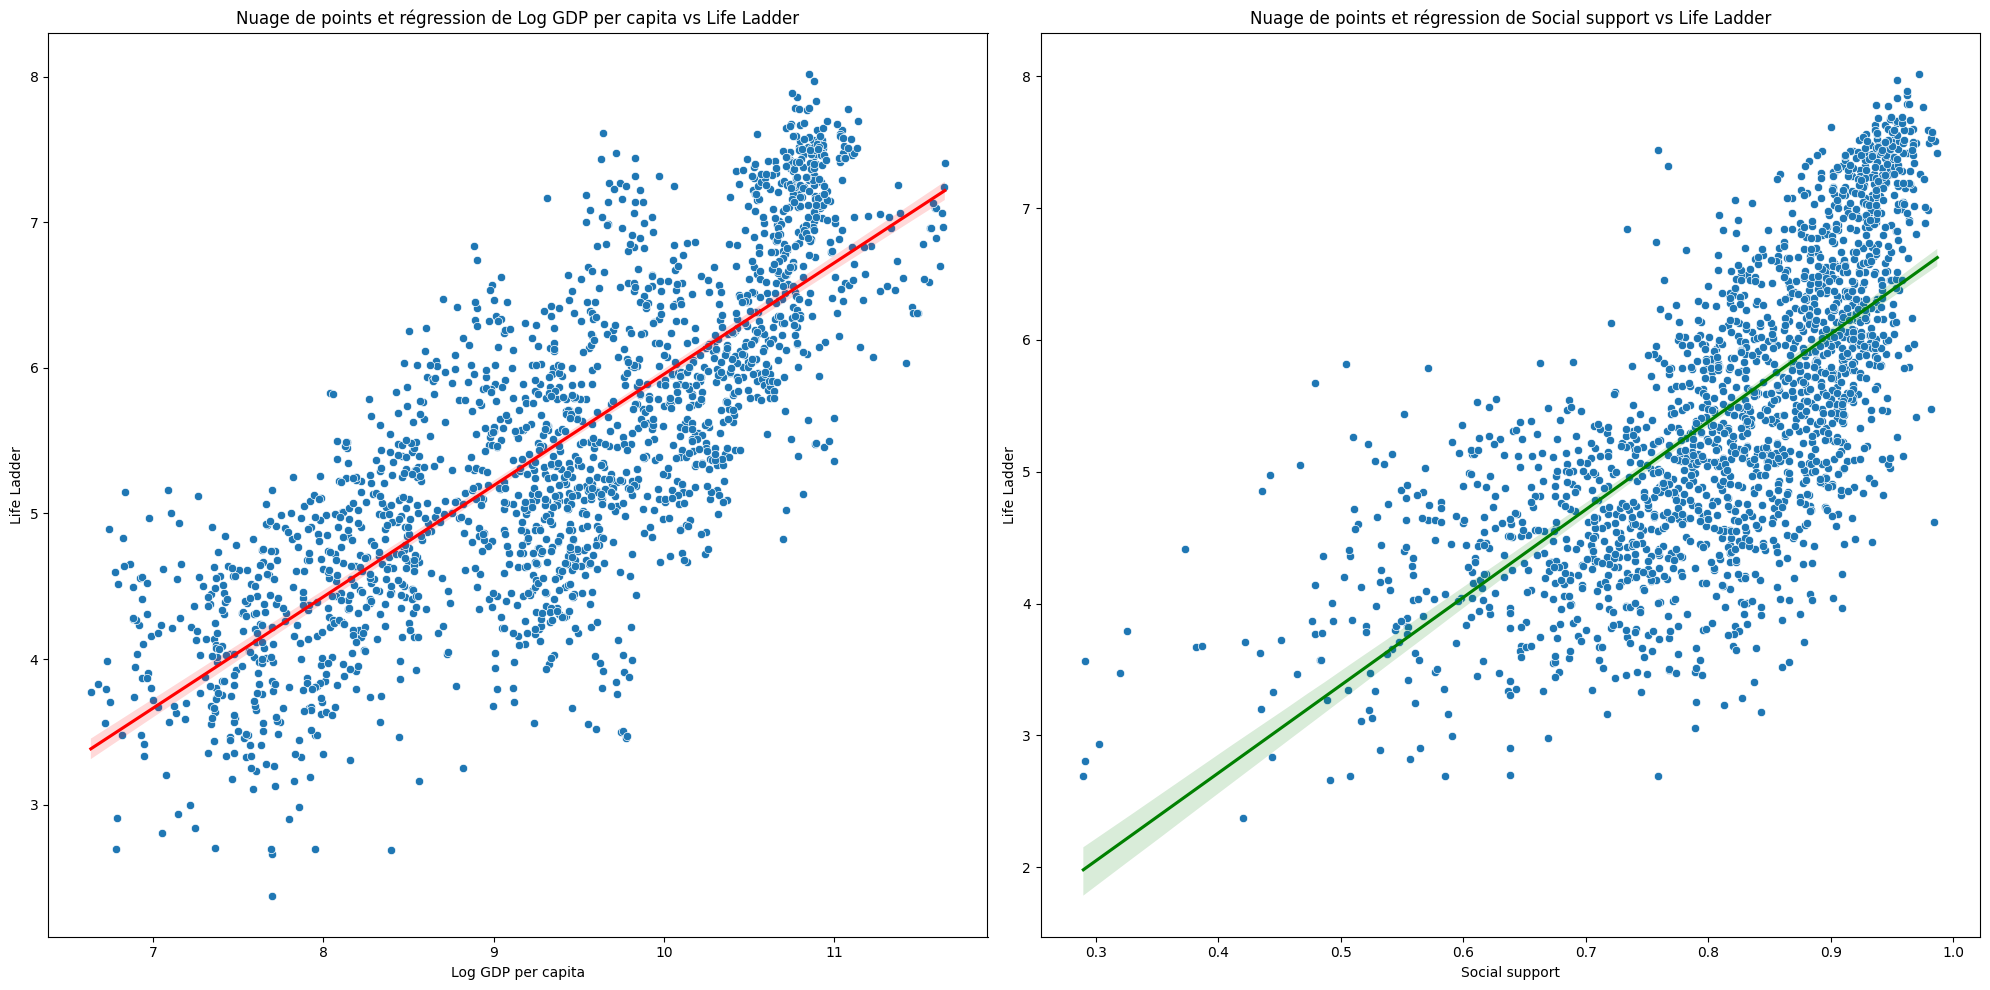

In [27]:
# Après l'analyse de la matrice de corrélation on essaye d'afficher certaines variables les plus corrélées avec la variable cible.
plt.figure(figsize=[20, 10])

# Premier sous-graphique
plt.subplot(1, 2, 1)
sns.scatterplot(y=df["Life Ladder"], x=df["Log GDP per capita"])
sns.regplot(y=df["Life Ladder"], x=df["Log GDP per capita"], scatter=False, color='red')  # Ajouter une ligne de régression
plt.ylabel("Life Ladder")
plt.xlabel("Log GDP per capita")
plt.title("Nuage de points et régression de Log GDP per capita vs Life Ladder")

# Deuxième sous-graphique
plt.subplot(1, 2, 2)
sns.scatterplot(y=df["Life Ladder"], x=df["Social support"])
sns.regplot(y=df["Life Ladder"], x=df["Social support"], scatter=False, color='green')  # Ajouter une ligne de régression
plt.ylabel("Life Ladder")
plt.xlabel("Social support")
plt.title("Nuage de points et régression de Social support vs Life Ladder")

# Afficher les deux sous-graphiques
plt.tight_layout()
plt.show()

Analyse statistique du premier graphique

In [28]:
# Calcul des corrélations entre toutes les paires de variables numériques
correlation_matrix = df[['Log GDP per capita', 'Social support', 'Life Ladder']].corr()
correlation_matrix

,Log GDP per capita,Social support,Life Ladder
Log GDP per capita,1.000000,0.692602,0.790166
Social support,0.692602,1.000000,0.707806
Life Ladder,0.790166,0.707806,1.000000


Les coefficients de corrélation que nous avons analysé indiquent une relation positive et significative entre les variables :

PIB par habitant (Log GDP per capita) et Score de bonheur (Life Ladder) : Avec un coefficient de 0.790166, il y a une forte corrélation positive. Cela suggère que les pays avec un PIB par habitant plus élevé ont tendance à avoir des scores de bonheur plus élevés.
Soutien social (Social support) et Score de bonheur (Life Ladder) : Avec un coefficient de 0.707806, il y a également une forte corrélation positive. Cela indique que les pays où les individus perçoivent un plus grand soutien social ont tendance à avoir des scores de bonheur plus élevés.
PIB par habitant (Log GDP per capita) et Soutien social (Social support) : Avec un coefficient de 0.692602, il y a une corrélation positive modérée, ce qui implique que les pays plus riches ont tendance à offrir un meilleur soutien social, mais cette relation n’est pas aussi forte que celle avec le score de bonheur.

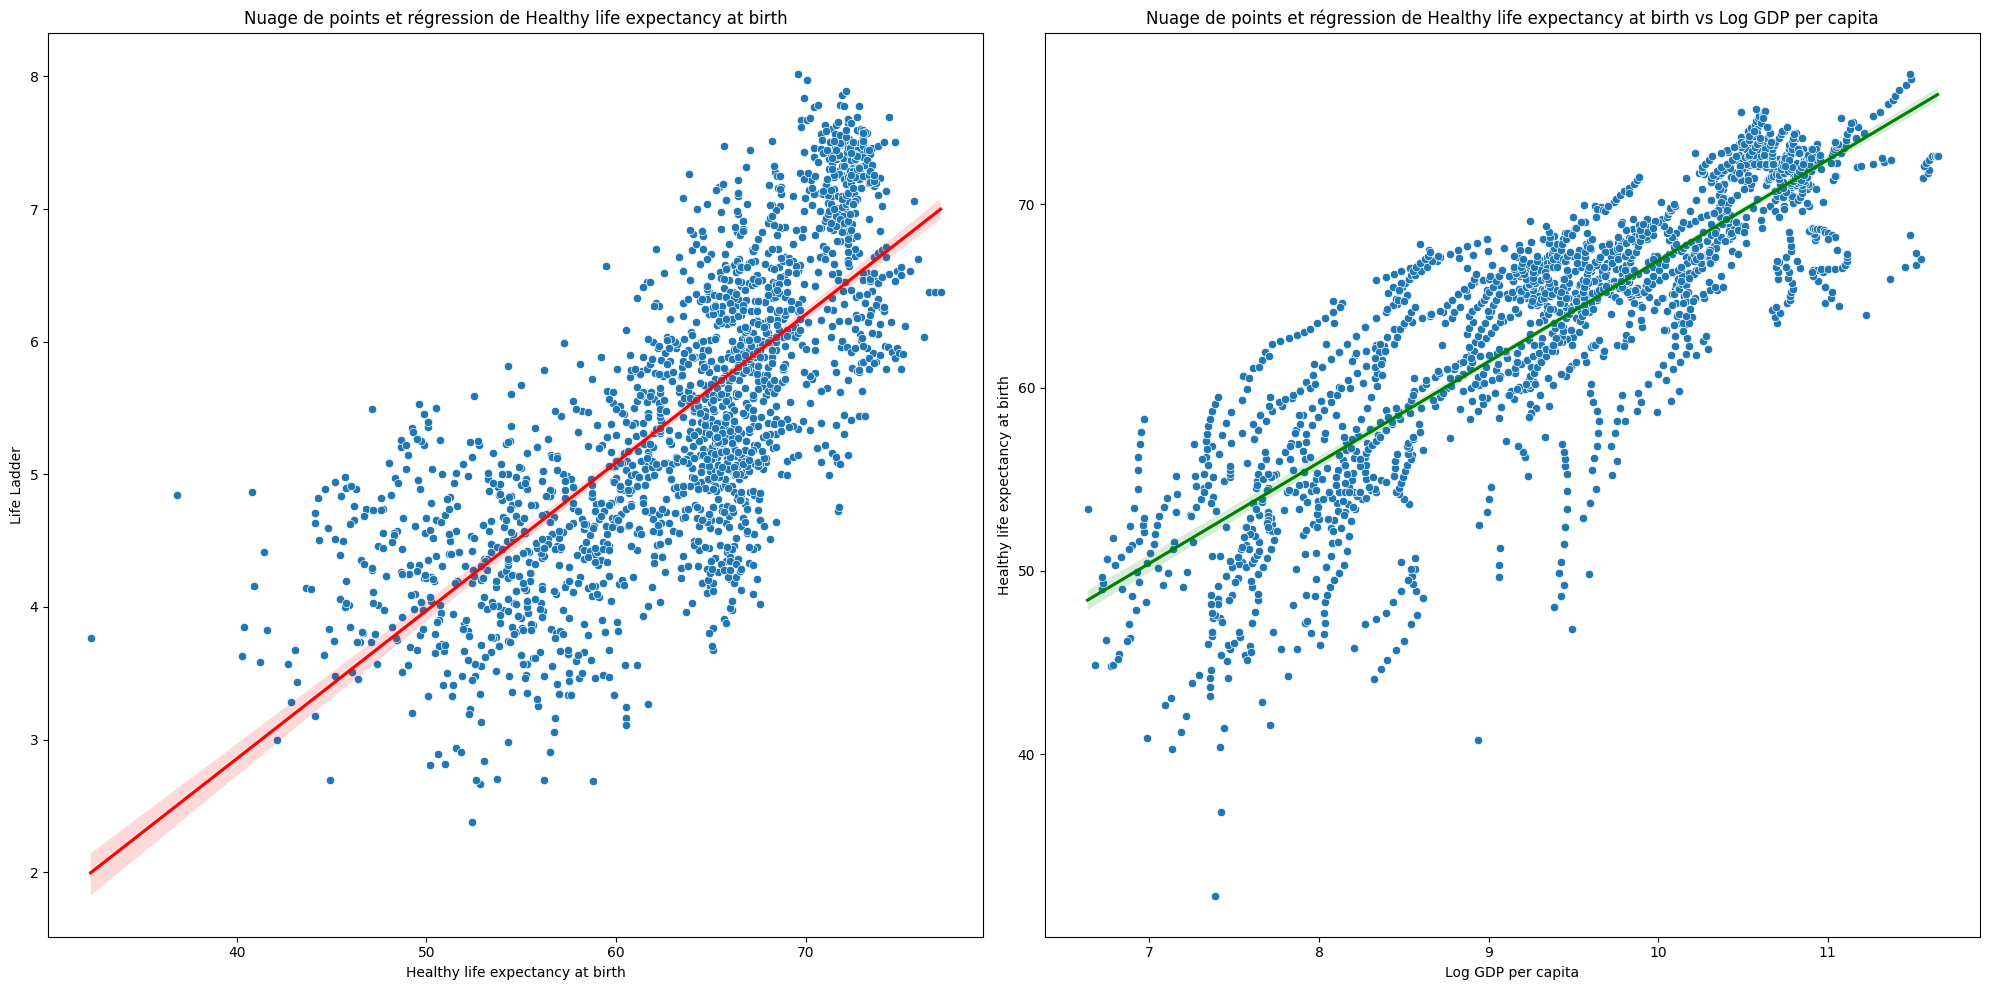

In [29]:
#même procédure sur d'autre variable, et entre "Log GDP per capita" et "Healthy life expectancy at birth"

plt.figure(figsize=[20, 10])
# Premier sous-graphique : Life Ladder vs Log GDP per capita
plt.subplot(1, 2, 1)
sns.scatterplot(y=df["Life Ladder"], x=df["Healthy life expectancy at birth"])
sns.regplot(y=df["Life Ladder"], x=df["Healthy life expectancy at birth"], scatter=False, color='red')  # Ajouter une ligne de régression
plt.ylabel("Life Ladder")
plt.xlabel("Healthy life expectancy at birth")
plt.title("Nuage de points et régression de Healthy life expectancy at birth")

# Deuxième sous-graphique : Log GDP per capita vs Healthy life expectancy at birth
plt.subplot(1, 2, 2)
sns.scatterplot(x=df["Log GDP per capita"], y=df["Healthy life expectancy at birth"])
sns.regplot(x=df["Log GDP per capita"], y=df["Healthy life expectancy at birth"], scatter=False, color='green')  # Ajouter une ligne de régression
plt.xlabel("Log GDP per capita")
plt.ylabel("Healthy life expectancy at birth")
plt.title("Nuage de points et régression de Healthy life expectancy at birth vs Log GDP per capita")

# Afficher les deux sous-graphiques
plt.tight_layout()
plt.show()

Analyse statistique du deuxième graphique

In [30]:

correlation_matrix2 = df[['Log GDP per capita',  'Healthy life expectancy at birth', 'Life Ladder']].corr()
# Afficher la matrice de corrélation
correlation_matrix2

,Log GDP per capita,Healthy life expectancy at birth,Life Ladder
Log GDP per capita,1.000000,0.848049,0.790166
Healthy life expectancy at birth,0.848049,1.000000,0.744506
Life Ladder,0.790166,0.744506,1.000000


Les coefficients de corrélation que nous avons calculé confirment une forte relation positive entre les variables :

PIB par habitant (Log GDP per capita) et Espérance de vie en bonne santé à la naissance (Healthy life expectancy at birth) : Avec un coefficient de 0.848049, cela indique que les pays avec un PIB par habitant plus élevé ont tendance à avoir une espérance de vie en bonne santé plus longue.
PIB par habitant (Log GDP per capita) et Score de bonheur (Life Ladder) : Avec un coefficient de 0.790166, il y a une forte corrélation positive, suggérant que les pays plus riches ont tendance à avoir des scores de bonheur plus élevés.
Espérance de vie en bonne santé à la naissance (Healthy life expectancy at birth) et Score de bonheur (Life Ladder) : Avec un coefficient de 0.744506, il y a également une corrélation positive significative, ce qui implique que les personnes vivant dans des pays avec une meilleure espérance de vie en bonne santé ont tendance à avoir un score de bonheur plus élevé.

### Analyse du facteur climat

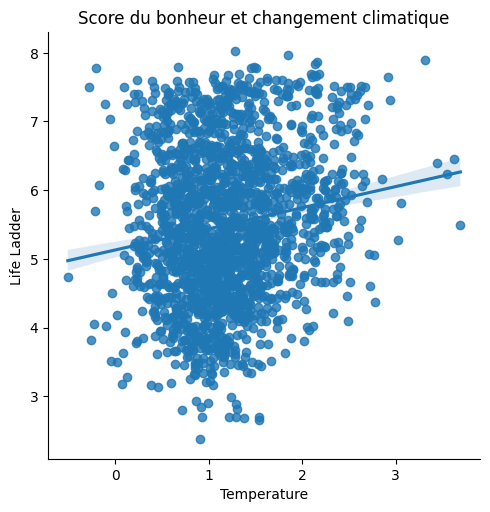

In [31]:
sns.lmplot(x="Temperature", y="Life Ladder", data=df)
plt.title ("Score du bonheur et changement climatique" );

C:\Users\yacin\AppData\Local\Temp\ipykernel_58032\1892885585.py:11: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




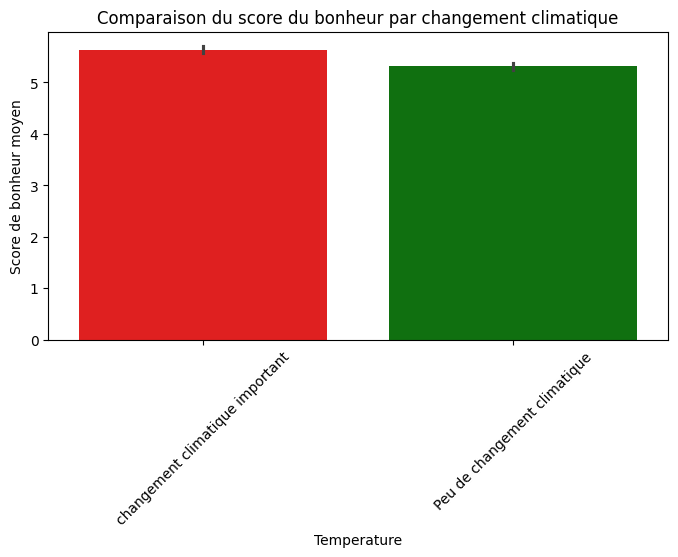

In [32]:
# Définir les changements climatiques
def climat_changement(climat):
    if climat > df['Temperature'].median():
        return 'changement climatique important'
    else:
        return 'Peu de changement climatique'

# Appliquer la fonction directement dans le graphique sans créer de nouvelle colonne
couleurs = {'changement climatique important': 'red', 'Peu de changement climatique': 'green'}
plt.figure(figsize=(8, 4))
sns.barplot(x=df['Temperature'].apply(climat_changement), y='Life Ladder', palette=couleurs, data=df)
plt.title('Comparaison du score du bonheur par changement climatique')
plt.ylabel('Score de bonheur moyen')
plt.xticks(rotation=45)
plt.show()

In [33]:
# Cela confirme qu'il n'y a pas de corrélation entre le score du bonheur et le changement climatique

### Analyse du facteur politique

In [34]:
df_pol = df[['Country name', 'year', 'Life Ladder', 'Freedom to make life choices', 'Perceptions of corruption', 'Social support', 'Regional indicator']]
df_pol.head(10)

,Country name,year,Life Ladder,Freedom to make life choices,Perceptions of corruption,Social support,Regional indicator
0,Denmark,2005,8.019,0.971,0.237,0.972,Western Europe
1,France,2005,7.093,0.895,0.688,0.940,Western Europe
2,Mexico,2005,6.581,0.814,0.764,0.903,Latin America and Caribbean
3,Germany,2005,6.620,0.847,0.781,0.963,Western Europe
4,Poland,2005,5.587,0.782,0.983,0.922,Central and Eastern Europe
5,Spain,2005,7.153,0.916,0.777,0.961,Western Europe
6,Greece,2005,6.006,0.734,0.861,0.837,Western Europe
7,Brazil,2005,6.637,0.882,0.745,0.883,Latin America and Caribbean
8,Sweden,2005,7.376,0.964,NaN,0.951,Western Europe
9,Egypt,2005,5.168,0.817,NaN,0.848,Middle East and North Africa


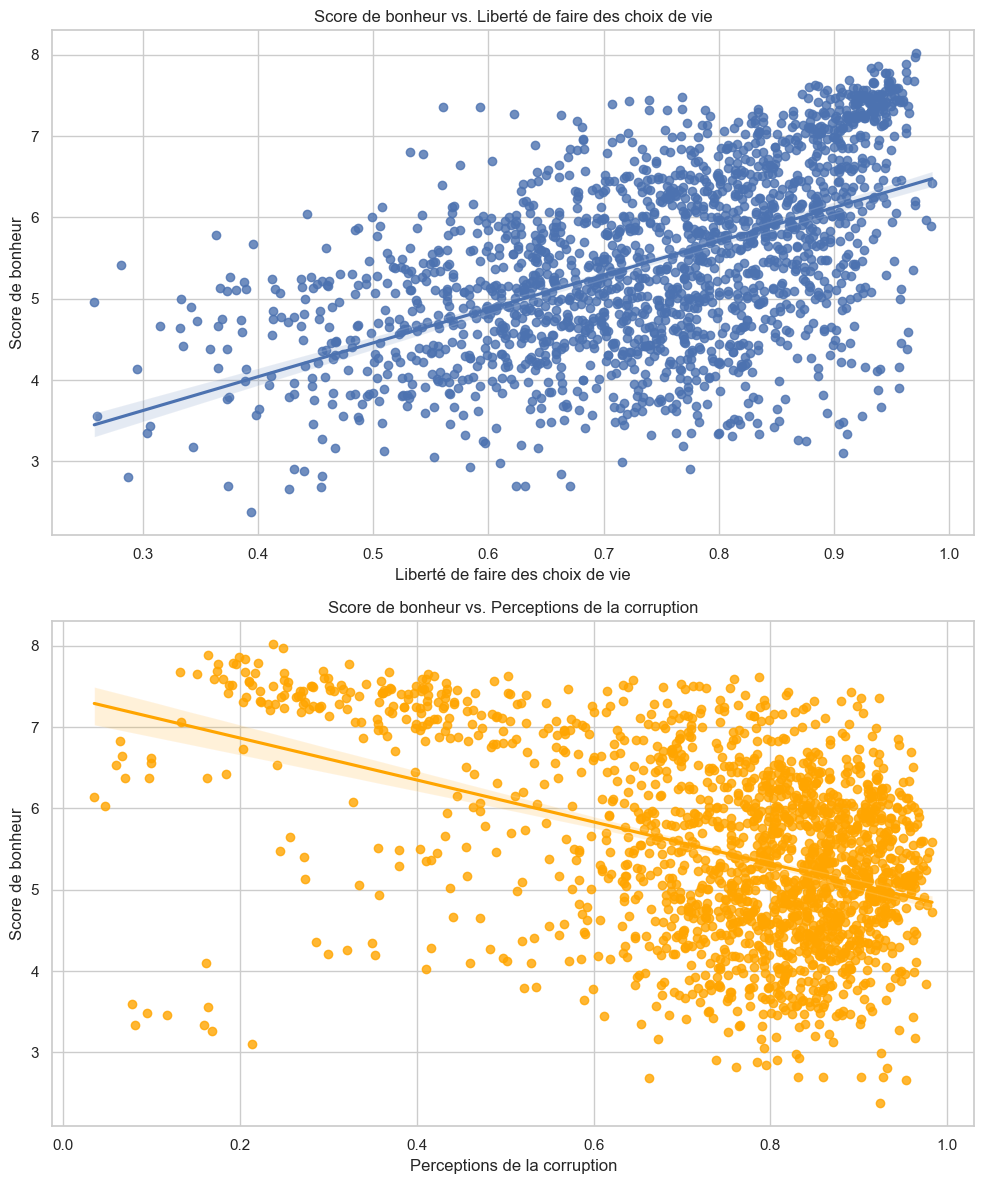

In [35]:
sns.set(style="whitegrid")

fig, ax = plt.subplots(2, 1, figsize=(10, 12))

sns.regplot(x='Freedom to make life choices', y='Life Ladder', data=df_pol, ax=ax[0])
ax[0].set_title('Score de bonheur vs. Liberté de faire des choix de vie')
ax[0].set_xlabel('Liberté de faire des choix de vie')
ax[0].set_ylabel('Score de bonheur')

sns.regplot(x='Perceptions of corruption', y='Life Ladder', data=df_pol, ax=ax[1], color='orange')
ax[1].set_title('Score de bonheur vs. Perceptions de la corruption')
ax[1].set_xlabel('Perceptions de la corruption')
ax[1].set_ylabel('Score de bonheur')

plt.tight_layout()
plt.show()

Score de bonheur vs. Liberté de faire des choix de vie : Ce diagramme de dispersion montre une relation positive entre la liberté de faire des choix de vie et le score de bonheur. Les pays où les citoyens ressentent une plus grande liberté de choisir leur propre chemin dans la vie ont tendance à avoir des scores de bonheur plus élevés.

Score de bonheur vs. Perceptions de la corruption : Le deuxième graphique, un diagramme de dispersion avec une ligne de régression, indique une relation négative entre les perceptions de la corruption et le score de bonheur. Cela suggère que dans les pays où la corruption est perçue comme étant élevée, les scores de bonheur tendent à être plus faibles.

Text(0.5, 1.0, 'Nuage de points et régression de Life Ladder vs Social support')

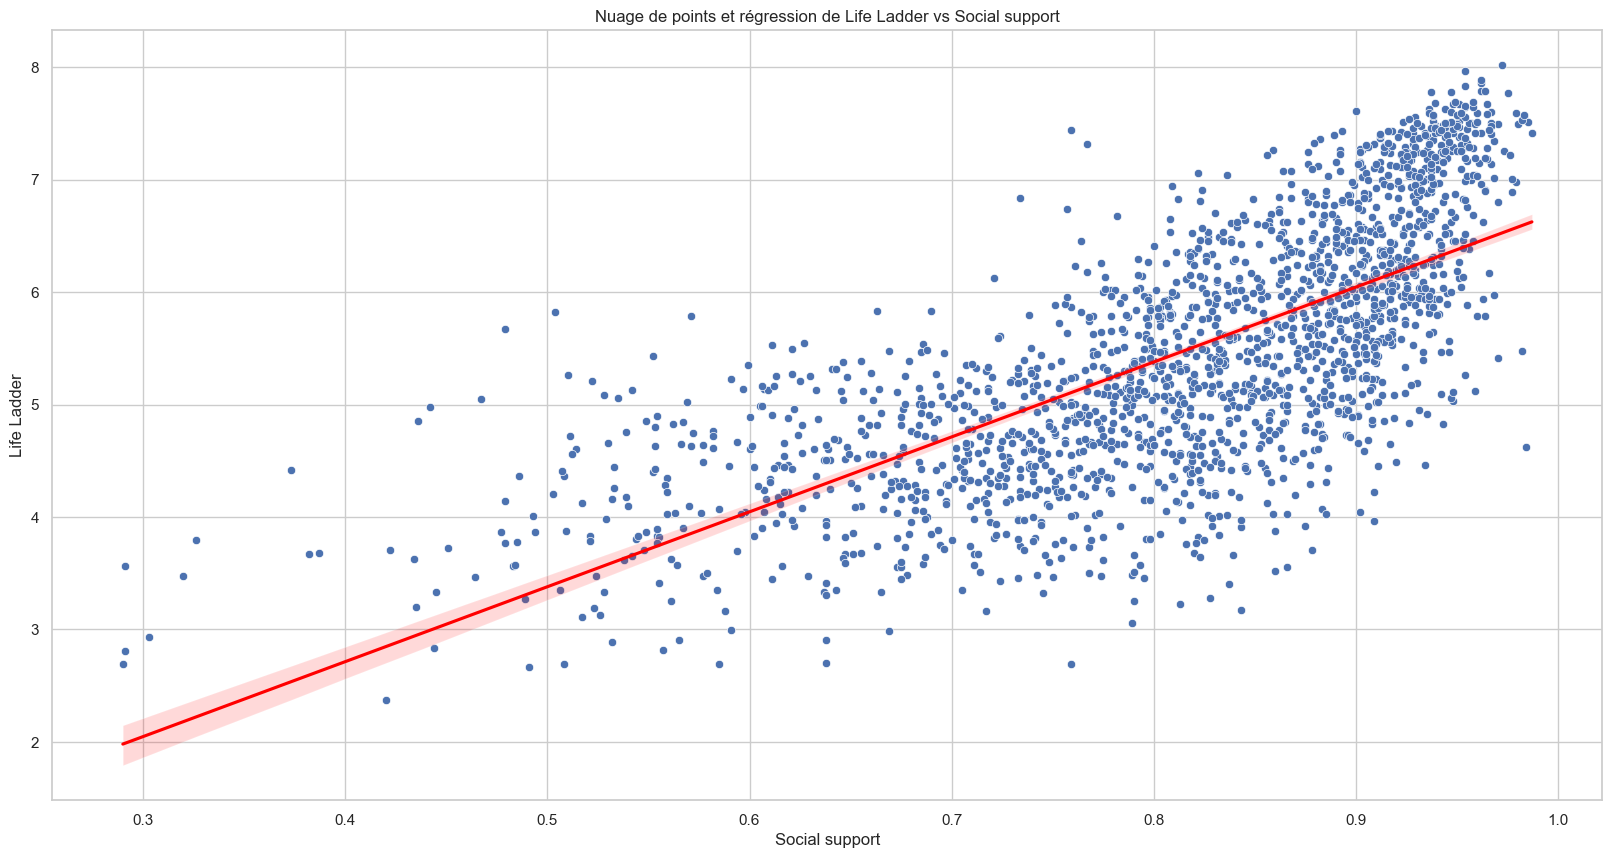

In [36]:
plt.figure(figsize=[20, 10])

# Premier graphique
sns.scatterplot(y=df["Life Ladder"], x=df["Social support"])
sns.regplot(y=df["Life Ladder"], x=df["Social support"], scatter=False, color='red')  # Ajouter une ligne de régression
plt.ylabel("Life Ladder")
plt.xlabel("Social support")
plt.title("Nuage de points et régression de Life Ladder vs Social support")


Score de bonheur vs. Support social : Ce diagramme de dispersion montre une relation positive forte entre le support social et le score de bonheur. Les pays où les gens perçoivent un niveau élevé de soutien social ont tendance à avoir des scores de bonheur plus élevés, ce qui souligne l'importance des relations et du soutien communautaire pour le bien-être général.

Conclusion :
Le heatmap de la matrice de corrélation illustre les relations entre les différentes variables de notre ensemble de données.

Voici quelques points clés à noter :

Il existe une forte corrélation positive entre le support social et le score de bonheur (0.71), ce qui souligne l'importance du soutien social pour le bien-être général.

La liberté de faire des choix de vie est également positivement corrélée avec le score de bonheur (0.53), ce qui suggère que la liberté personnelle joue un rôle clé dans la perception du bonheur.

Les perceptions de la corruption sont négativement corrélées avec le score de bonheur (-0.43), indiquant que la corruption perçue peut diminuer le bien-être.

Les relations entre la liberté de faire des choix de vie et les perceptions de la corruption (-0.49) montrent que dans les pays où les gens se sentent libres de faire leurs propres choix, la perception de la corruption tend à être plus faible.

### Analyse du facteur de la Santé 

I - Santé physique

A - Traitement / compréhension des données en lien avec la Santé au sens large (focus sur la colonne "Healthy life at birth")

Nous nous proposons de démontrer dans cette partie qu'il existe un lien entre l'amélioration globale de la santé dans le monde se traduisant par une augmentation de l'espérance de vie à la naissance (calcul de l'âge moyen de l'espérance de vie collecté par l'Organisation Mondiale de la Santé) et 'évaluation du bien être

In [37]:
df_health=df[['Country name', 'year', 'Life Ladder','Healthy life expectancy at birth']]

In [38]:
df_health.head(10)

,Country name,year,Life Ladder,Healthy life expectancy at birth
0,Denmark,2005,8.019,69.6
1,France,2005,7.093,71.3
2,Mexico,2005,6.581,66.2
3,Germany,2005,6.620,70.2
4,Poland,2005,5.587,66.3
5,Spain,2005,7.153,71.5
6,Greece,2005,6.006,70.5
7,Brazil,2005,6.637,63.3
8,Sweden,2005,7.376,71.2
9,Egypt,2005,5.168,59.7


3 - Vue statistiques du Dataframe df_health

In [39]:
df_health.describe()


,year,Life Ladder,Healthy life expectancy at birth
count,1949.000000,1949.000000,1894.000000
mean,2013.216008,5.466705,63.359374
std,4.166828,1.115711,7.510245
min,2005.000000,2.375000,32.300000
25%,2010.000000,4.640000,58.685000
50%,2013.000000,5.386000,65.200000
75%,2017.000000,6.283000,68.590000
max,2020.000000,8.019000,77.100000


1 - Analyse univariée (Age moyen d'espérance de vie)

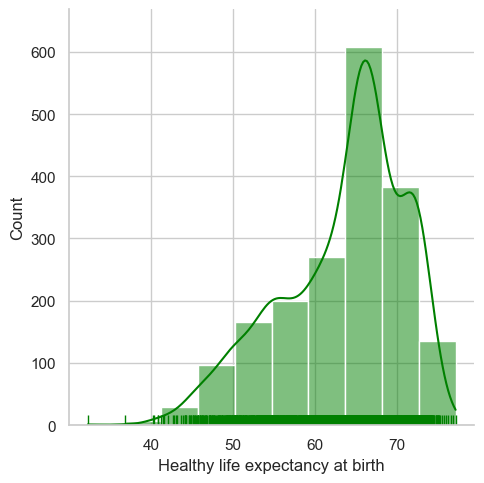

In [40]:
sns.displot(df_health['Healthy life expectancy at birth'], bins=10, rug=True, color ='green', kde=True);

2 - Evolution de l'espérance de vie entre 2005 et 2020

<Figure size 2000x1000 with 0 Axes>

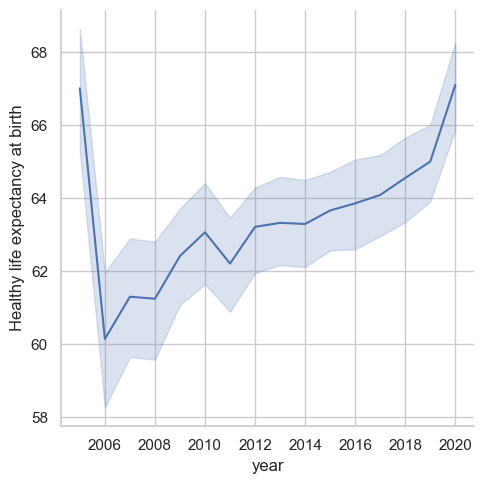

In [41]:
plt.figure(figsize=[20, 10])
sns.relplot(x = "year", y = "Healthy life expectancy at birth", data = df_health, kind='line');

In [42]:
df_health['year'].value_counts().sort_index(ascending=False)

year
2020     95
2019    144
2018    142
2017    147
2016    142
2015    143
2014    145
2013    137
2012    142
2011    146
2010    124
2009    114
2008    110
2007    102
2006     89
2005     27
Name: count, dtype: int64

Nous notons une augmentation globale de l'espérance de vie entre 2008 et 2020.

3 - Lien entre bien-être et espérance de vie

<Figure size 2000x1000 with 0 Axes>

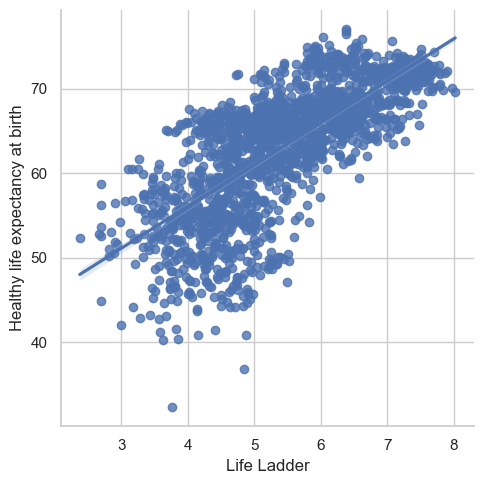

In [43]:
plt.figure(figsize=[20, 10])
sns.lmplot(x="Life Ladder", y="Healthy life expectancy at birth", data=df_health)

Le coefficient de corrélation de 0,78 indique une corrélation positive forte entre 'évaluation due bien-êtr (Life Ladder) et l’espérance de vie en bonne santé à la naissance. La valeur p nulle suggère que cette corrélation n’est pas due au hasard et est statistiquement significative.

Nous pouvons conclure que, bien qu'il existe de corrélation linéaire entre le score du bonheur et l'espérance de vie à la naissance, il existe, cependant, une corrélation forte entre les deux variables. En effet, en observant la carte heatmap ci-dessus, nous constatons que le niveau de corrélation entre les deux variables est significatif (7.4)

## Traitement des valeurs manquantes

In [44]:
#Scrapping de la variable "Log GDP per capita"
import requests
import math
# Mapping des noms de pays à leurs codes ISO utilisés par l'API de la Banque mondiale
country_codes = {
    'Cuba': 'CUB',
    'Somaliland region': 'SOM',  # Note: Somaliland n'a peut-être pas de code ISO officiel
    'North Cyprus': 'CYP',  # Note: North Cyprus n'a pas de code ISO officiel
    'Somalia': 'SOM',
    'South Sudan': 'SSD',
    'Yemen': 'YEM',
    'Taiwan Province of China': 'TWN',  # Note: Utilisez TWN pour Taiwan
    'Venezuela': 'VEN',
    'Palestinian Territories': 'PSE',
    'Iran': 'IRN',
    'Hong Kong S.A.R. of China': 'HKG',
    'Kosovo': 'XKX',  # Note: Kosovo utilise XKX comme code ISO
    'Cyprus': 'CYP',
    'Malta': 'MLT'
}

# Fonction pour récupérer le PIB par habitant et calculer son logarithme
def get_log_gdp(country_name, year):
    if country_name not in country_codes:
        return None

    country_code = country_codes[country_name]
    url = f'http://api.worldbank.org/v2/country/{country_code}/indicator/NY.GDP.PCAP.CD?date={year}&format=json'
    response = requests.get(url)
    if response.status_code == 200:
        data = response.json()
        if data and len(data) > 1 and data[1]:
            gdp_value = data[1][0].get('value', None)
            if gdp_value:
                return math.log(gdp_value)
    return None

# Liste pour stocker les résultats
log_gdp_results = []

# Compléter les données manquantes et stocker les résultats dans la liste
for index, row in df.iterrows():
    if pd.isna(row['Log GDP per capita']):
        country = row['Country name']
        year = row['year']
        log_gdp = get_log_gdp(country, year)
        log_gdp_results.append(log_gdp)
        if log_gdp is not None:
            df.at[index, 'Log GDP per capita'] = log_gdp
    else:
        log_gdp_results.append(row['Log GDP per capita'])

# Mettre à jour le DataFrame avec les résultats de la liste
df['Log GDP per capita'] = log_gdp_results

# Afficher le DataFrame mis à jour
df.isna().sum()


Country name                          0
year                                  0
Life Ladder                           0
Log GDP per capita                    8
Social support                       13
Healthy life expectancy at birth     55
Freedom to make life choices         32
Generosity                           89
Perceptions of corruption           110
Positive affect                      22
Negative affect                      16
Regional indicator                    0
Temperature                         110
dtype: int64

In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.impute import KNNImputer

# Trier les données par pays et par année
df = df.sort_values(by=['Country name', 'year'])

# Fonction pour l'imputation par régression linéaire
def linear_regression_imputation(df, column):
    for name, group in df.groupby('Country name'):
        if group[column].isnull().any():
            X_train = group.loc[group[column].notna(), 'year'].values.reshape(-1, 1)
            y_train = group.loc[group[column].notna(), column].values
            X_missing = group.loc[group[column].isna(), 'year'].values.reshape(-1, 1)

            if len(X_train) > 1:
                model = LinearRegression()
                model.fit(X_train, y_train)
                predicted_values = model.predict(X_missing)
                df.loc[group.index[group[column].isna()], column] = predicted_values

# Appliquer l'imputation par régression linéaire pour chaque variable
variables = ['Log GDP per capita', 'Generosity', 'Social support',
             'Healthy life expectancy at birth', 'Freedom to make life choices',
             'Perceptions of corruption', 'Positive affect', 'Negative affect', 'Temperature']
for var in variables:
    linear_regression_imputation(df, var)

# Appliquer l'imputation par KNN pour les valeurs manquantes restantes
imputer = KNNImputer(n_neighbors=5)
df[variables] = imputer.fit_transform(df[variables])

# Vérifier les valeurs manquantes restantes
print("Valeurs manquantes après imputation par KNN:")
df.isna().sum()


Valeurs manquantes après imputation par KNN:


Country name                        0
year                                0
Life Ladder                         0
Log GDP per capita                  0
Social support                      0
Healthy life expectancy at birth    0
Freedom to make life choices        0
Generosity                          0
Perceptions of corruption           0
Positive affect                     0
Negative affect                     0
Regional indicator                  0
Temperature                         0
dtype: int64

## Encodage des variables "Country name" et Regional indicator".

In [46]:
from sklearn.preprocessing import OneHotEncoder


# Instancier et appliquer l'encodage one-hot pour la variable "Country name"
onehot_encoder_country = OneHotEncoder(sparse_output =False)
country_encoded = onehot_encoder_country.fit_transform(df[['Country name']])
country_columns = [f'Country_{name}' for name in onehot_encoder_country.categories_[0]]

# Créer un dataframe à partir des résultats de l'encodage one-hot pour les pays
country_encoded_df = pd.DataFrame(country_encoded, columns=country_columns)

# Instancier et appliquer l'encodage one-hot pour la variable "Regional indicator"
onehot_encoder_region = OneHotEncoder(sparse_output =False)
region_encoded = onehot_encoder_region.fit_transform(df[['Regional indicator']])
region_columns = [f'Region_{name}' for name in onehot_encoder_region.categories_[0]]

# Créer un dataframe à partir des résultats de l'encodage one-hot pour les régions
region_encoded_df = pd.DataFrame(region_encoded, columns=region_columns)

# Concaténer les dataframes encodés avec le dataframe original
df = pd.concat([df, country_encoded_df, region_encoded_df], axis=1)

# Supprimer les colonnes originales des variables catégorielles
df.drop(['Country name', 'Regional indicator'], axis=1, inplace=True)


In [47]:
df.head()

,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,...,Region_Central and Eastern Europe,Region_Commonwealth of Independent States,Region_East Asia,Region_Latin America and Caribbean,Region_Middle East and North Africa,Region_North America,Region_South Asia,Region_Southeast Asia,Region_Sub-Saharan Africa,Region_Western Europe
229,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
388,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
451,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
704,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
836,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


## Modelesation 

In [48]:
from sklearn.model_selection import train_test_split

# Définir les features et la target
X = df.drop('Life Ladder', axis=1)  # Toutes les colonnes sauf 'Life Ladder'
y = df['Life Ladder']               # La colonne 'Life Ladder'

# Séparer les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Afficher les dimensions des ensembles pour vérifier
print("Taille de l'ensemble d'entraînement :", X_train.shape, y_train.shape)
print("Taille de l'ensemble de test :", X_test.shape, y_test.shape)

Taille de l'ensemble d'entraînement : (1559, 187) (1559,)
Taille de l'ensemble de test : (390, 187) (390,)


###  Model de regression linière

In [49]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Créer l'instance du modèle
model = LinearRegression()

# Entraîner le modèle sur l'ensemble d'entraînement
model.fit(X_train, y_train)

# Prédictions sur l'ensemble d'entraînement
y_train_pred = model.predict(X_train)

# Prédictions sur l'ensemble de test
y_test_pred = model.predict(X_test)

# Calcul des performances
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f"Ensemble d'entraînement: MSE = {mse_train:.2f}, R² = {r2_train:.2f}")
print(f"Ensemble de test: MSE = {mse_test:.2f}, R² = {r2_test:.2f}")


Ensemble d'entraînement: MSE = 0.26, R² = 0.79
Ensemble de test: MSE = 0.33, R² = 0.74


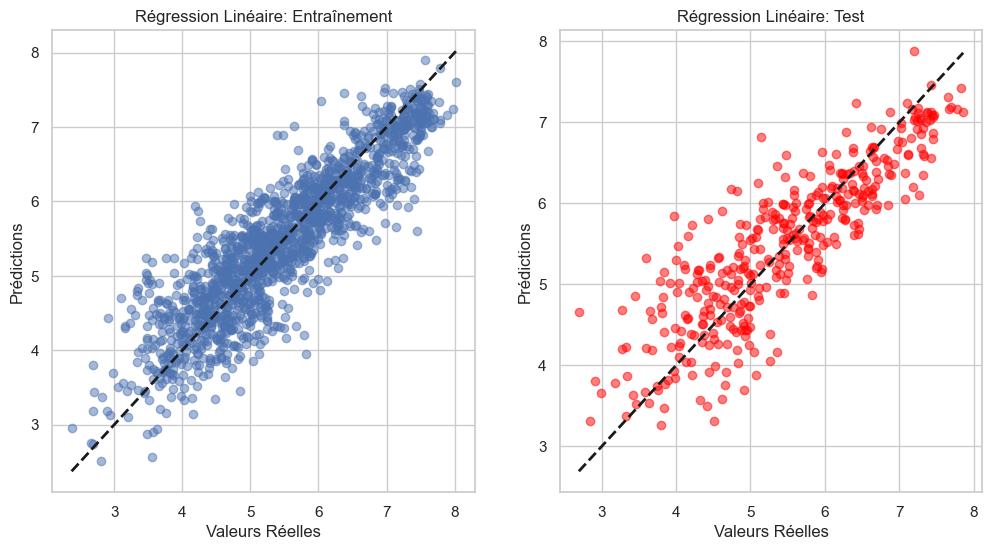

In [50]:
# Graphique des prédictions vs valeurs réelles pour l'entraînement
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)  # 1 ligne, 2 colonnes, 1er subplot
plt.scatter(y_train, y_train_pred, alpha=0.5)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2)
plt.title('Régression Linéaire: Entraînement')
plt.xlabel('Valeurs Réelles')
plt.ylabel('Prédictions')

# Graphique des prédictions vs valeurs réelles pour le test
plt.subplot(1, 2, 2)  # 1 ligne, 2 colonnes, 2e subplot
plt.scatter(y_test, y_test_pred, alpha=0.5, color='red')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title('Régression Linéaire: Test')
plt.xlabel('Valeurs Réelles')
plt.ylabel('Prédictions')

plt.show()


### Model de regression Ridge

In [51]:
from sklearn.linear_model import Ridge

# Création du modèle Ridge
# alpha est le paramètre de régularisation (plus il est élevé, plus la régularisation est forte)
ridge_model = Ridge(alpha=1.0)

# Entraînement du modèle sur l'ensemble d'entraînement
ridge_model.fit(X_train, y_train)

# Prédictions sur l'ensemble d'entraînement
y_train_pred_ridge = ridge_model.predict(X_train)

# Prédictions sur l'ensemble de test
y_test_pred_ridge = ridge_model.predict(X_test)

# Calcul des performances
mse_train_ridge = mean_squared_error(y_train, y_train_pred_ridge)
r2_train_ridge = r2_score(y_train, y_train_pred_ridge)
mse_test_ridge = mean_squared_error(y_test, y_test_pred_ridge)
r2_test_ridge = r2_score(y_test, y_test_pred_ridge)

print(f"Ridge - Ensemble d'entraînement: MSE = {mse_train_ridge:.2f}, R² = {r2_train_ridge:.2f}")
print(f"Ridge - Ensemble de test: MSE = {mse_test_ridge:.2f}, R² = {r2_test_ridge:.2f}")


Ridge - Ensemble d'entraînement: MSE = 0.26, R² = 0.79
Ridge - Ensemble de test: MSE = 0.33, R² = 0.74


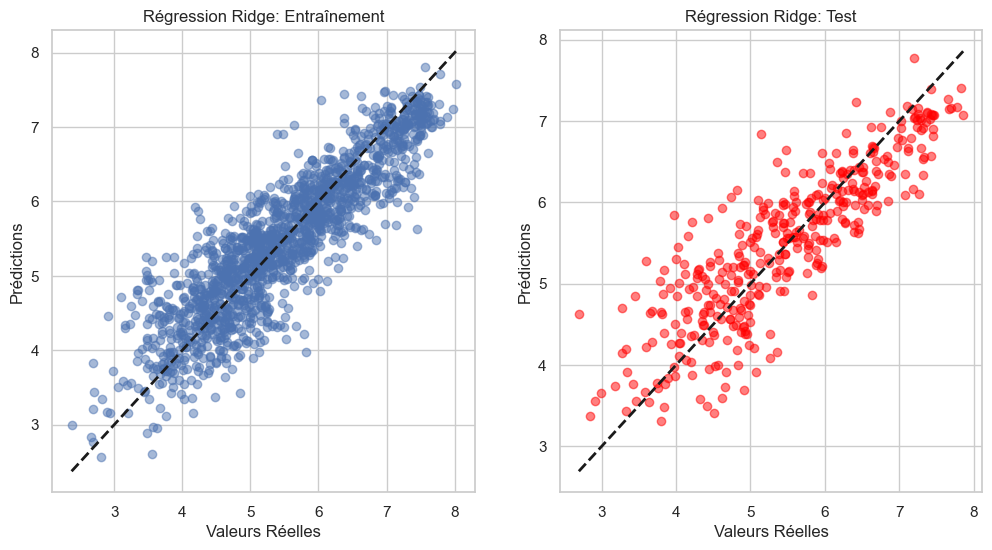

In [52]:
# Graphique des prédictions vs valeurs réelles pour l'entraînement avec Ridge
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)  # 1 ligne, 2 colonnes, 1er subplot
plt.scatter(y_train, y_train_pred_ridge, alpha=0.5)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2)
plt.title('Régression Ridge: Entraînement')
plt.xlabel('Valeurs Réelles')
plt.ylabel('Prédictions')

# Graphique des prédictions vs valeurs réelles pour le test avec Ridge
plt.subplot(1, 2, 2)  # 1 ligne, 2 colonnes, 2e subplot
plt.scatter(y_test, y_test_pred_ridge, alpha=0.5, color='red')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title('Régression Ridge: Test')
plt.xlabel('Valeurs Réelles')
plt.ylabel('Prédictions')

plt.show()


### Model Lasso

In [53]:
from sklearn.linear_model import Lasso
# Création du modèle Lasso
# alpha est le paramètre de régularisation (plus il est élevé, plus la régularisation est forte)
lasso_model = Lasso(alpha=0.01)  # alpha devrait être choisi judicieusement, souvent via la validation croisée

# Entraînement du modèle sur l'ensemble d'entraînement
lasso_model.fit(X_train, y_train)

# Prédictions sur l'ensemble d'entraînement
y_train_pred_lasso = lasso_model.predict(X_train)

# Prédictions sur l'ensemble de test
y_test_pred_lasso = lasso_model.predict(X_test)

# Calcul des performances
mse_train_lasso = mean_squared_error(y_train, y_train_pred_lasso)
r2_train_lasso = r2_score(y_train, y_train_pred_lasso)
mse_test_lasso = mean_squared_error(y_test, y_test_pred_lasso)
r2_test_lasso = r2_score(y_test, y_test_pred_lasso)

print(f"Lasso - Ensemble d'entraînement: MSE = {mse_train_lasso:.2f}, R² = {r2_train_lasso:.2f}")
print(f"Lasso - Ensemble de test: MSE = {mse_test_lasso:.2f}, R² = {r2_test_lasso:.2f}")


Lasso - Ensemble d'entraînement: MSE = 0.31, R² = 0.75
Lasso - Ensemble de test: MSE = 0.34, R² = 0.73


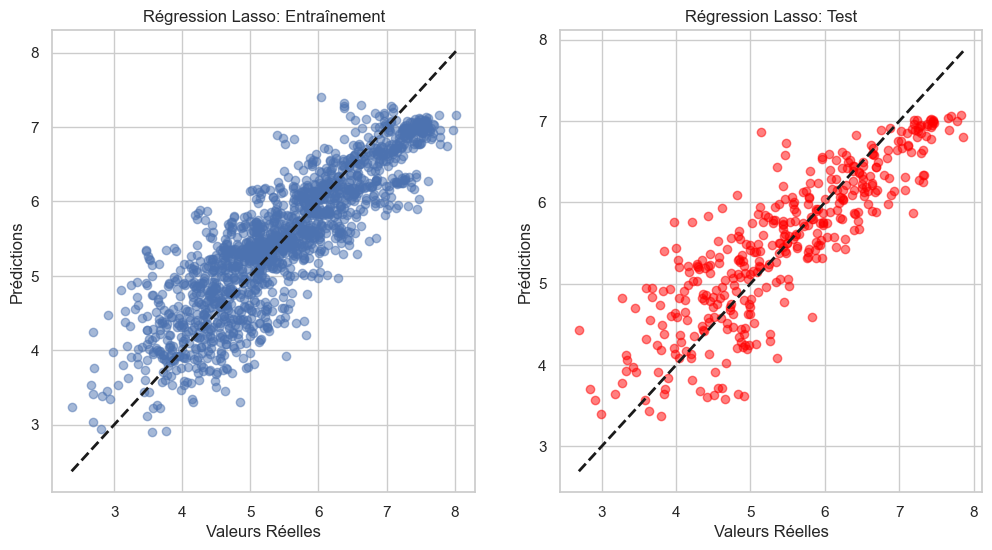

In [54]:
# Graphique des prédictions vs valeurs réelles pour l'entraînement avec Lasso
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)  # 1 ligne, 2 colonnes, 1er subplot
plt.scatter(y_train, y_train_pred_lasso, alpha=0.5)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2)
plt.title('Régression Lasso: Entraînement')
plt.xlabel('Valeurs Réelles')
plt.ylabel('Prédictions')

# Graphique des prédictions vs valeurs réelles pour le test avec Lasso
plt.subplot(1, 2, 2)  # 1 ligne, 2 colonnes, 2e subplot
plt.scatter(y_test, y_test_pred_lasso, alpha=0.5, color='red')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title('Régression Lasso: Test')
plt.xlabel('Valeurs Réelles')
plt.ylabel('Prédictions')

plt.show()

### Model ElasticNete

In [55]:
from sklearn.linear_model import ElasticNet
# Création du modèle Elastic Net
# alpha est le paramètre de régularisation total
# l1_ratio est le compromis entre la pénalité Lasso (l1) et Ridge (l2), avec 0.5 étant un équilibre égal
elastic_net_model = ElasticNet(alpha=0.1, l1_ratio=0.5)

# Entraînement du modèle sur l'ensemble d'entraînement
elastic_net_model.fit(X_train, y_train)

# Prédictions sur l'ensemble d'entraînement
y_train_pred_elastic = elastic_net_model.predict(X_train)

# Prédictions sur l'ensemble de test
y_test_pred_elastic = elastic_net_model.predict(X_test)

# Calcul des performances
mse_train_elastic = mean_squared_error(y_train, y_train_pred_elastic)
r2_train_elastic = r2_score(y_train, y_train_pred_elastic)
mse_test_elastic = mean_squared_error(y_test, y_test_pred_elastic)
r2_test_elastic = r2_score(y_test, y_test_pred_elastic)

print(f"Elastic Net - Ensemble d'entraînement: MSE = {mse_train_elastic:.2f}, R² = {r2_train_elastic:.2f}")
print(f"Elastic Net - Ensemble de test: MSE = {mse_test_elastic:.2f}, R² = {r2_test_elastic:.2f}")


Elastic Net - Ensemble d'entraînement: MSE = 0.46, R² = 0.63
Elastic Net - Ensemble de test: MSE = 0.50, R² = 0.61


In [56]:
from sklearn.linear_model import ElasticNetCV

# Création et entraînement du modèle ElasticNetCV
elastic_cv_model = ElasticNetCV(l1_ratio=[.1, .5, .7, .9, .95, .99, 1], cv=5)
elastic_cv_model.fit(X_train, y_train)

# Utiliser les meilleurs paramètres trouvés
print("Meilleur alpha trouvé :", elastic_cv_model.alpha_)
print("Meilleur l1_ratio trouvé :", elastic_cv_model.l1_ratio_)

# Prédictions et évaluation
y_train_pred_elastic_cv = elastic_cv_model.predict(X_train)
y_test_pred_elastic_cv = elastic_cv_model.predict(X_test)

print(f"ElasticNetCV - Ensemble d'entraînement: R² = {r2_score(y_train, y_train_pred_elastic_cv):.2f}")
print(f"ElasticNetCV - Ensemble de test: R² = {r2_score(y_test, y_test_pred_elastic_cv):.2f}")


Meilleur alpha trouvé : 0.0062064340879767425
Meilleur l1_ratio trouvé : 1.0
ElasticNetCV - Ensemble d'entraînement: R² = 0.76
ElasticNetCV - Ensemble de test: R² = 0.74


### Model Random Forest Regressor

In [57]:
from sklearn.ensemble import RandomForestRegressor
# Création du modèle Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Entraînement du modèle sur l'ensemble d'entraînement
rf_model.fit(X_train, y_train)

# Prédictions sur l'ensemble d'entraînement
y_train_pred_rf = rf_model.predict(X_train)

# Prédictions sur l'ensemble de test
y_test_pred_rf = rf_model.predict(X_test)

# Calcul des performances
mse_train_rf = mean_squared_error(y_train, y_train_pred_rf)
r2_train_rf = r2_score(y_train, y_train_pred_rf)
mse_test_rf = mean_squared_error(y_test, y_test_pred_rf)
r2_test_rf = r2_score(y_test, y_test_pred_rf)

print(f"Random Forest - Ensemble d'entraînement: MSE = {mse_train_rf:.2f}, R² = {r2_train_rf:.2f}")
print(f"Random Forest - Ensemble de test: MSE = {mse_test_rf:.2f}, R² = {r2_test_rf:.2f}")


Random Forest - Ensemble d'entraînement: MSE = 0.02, R² = 0.98
Random Forest - Ensemble de test: MSE = 0.19, R² = 0.85


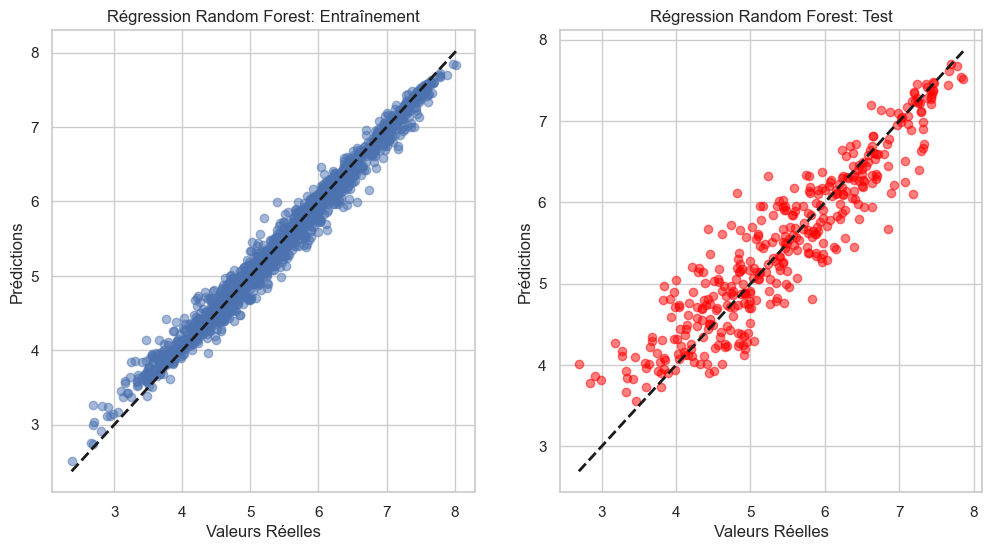

In [58]:
# Graphique des prédictions vs valeurs réelles pour l'entraînement avec Random Forest
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)  # 1 ligne, 2 colonnes, 1er subplot
plt.scatter(y_train, y_train_pred_rf, alpha=0.5)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2)
plt.title('Régression Random Forest: Entraînement')
plt.xlabel('Valeurs Réelles')
plt.ylabel('Prédictions')

# Graphique des prédictions vs valeurs réelles pour le test avec Random Forest
plt.subplot(1, 2, 2)  # 1 ligne, 2 colonnes, 2e subplot
plt.scatter(y_test, y_test_pred_rf, alpha=0.5, color='red')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title('Régression Random Forest: Test')
plt.xlabel('Valeurs Réelles')
plt.ylabel('Prédictions')

plt.show()


### Model XGBRegressor

In [59]:
from xgboost import XGBRegressor

# Création du modèle XGBoost
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

# Entraînement du modèle sur l'ensemble d'entraînement
xgb_model.fit(X_train, y_train)

# Prédictions sur l'ensemble d'entraînement
y_train_pred_xgb = xgb_model.predict(X_train)

# Prédictions sur l'ensemble de test
y_test_pred_xgb = xgb_model.predict(X_test)

# Calcul des performances
mse_train_xgb = mean_squared_error(y_train, y_train_pred_xgb)
r2_train_xgb = r2_score(y_train, y_train_pred_xgb)
mse_test_xgb = mean_squared_error(y_test, y_test_pred_xgb)
r2_test_xgb = r2_score(y_test, y_test_pred_xgb)

print(f"XGBoost - Ensemble d'entraînement: MSE = {mse_train_xgb:.2f}, R² = {r2_train_xgb:.2f}")
print(f"XGBoost - Ensemble de test: MSE = {mse_test_xgb:.2f}, R² = {r2_test_xgb:.2f}")


XGBoost - Ensemble d'entraînement: MSE = 0.04, R² = 0.97
XGBoost - Ensemble de test: MSE = 0.19, R² = 0.85


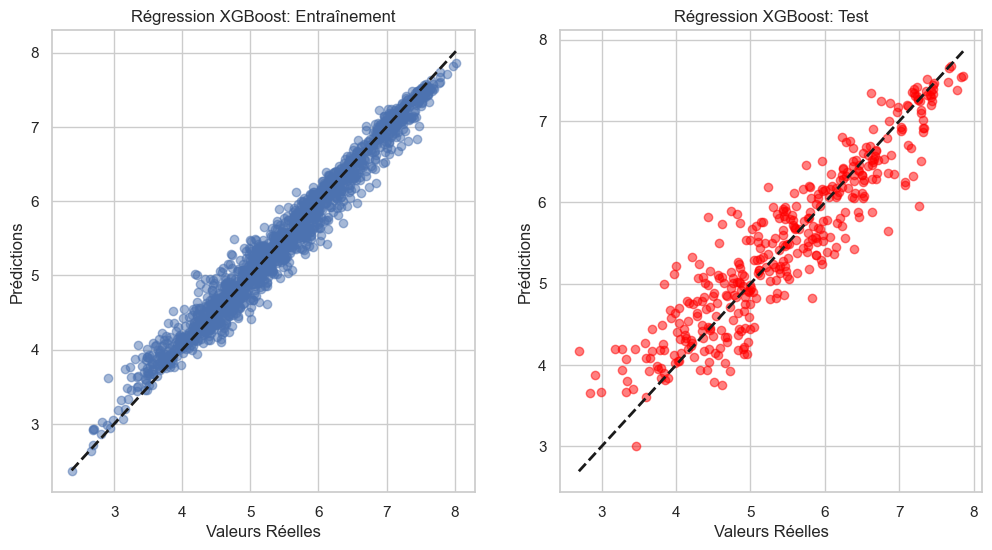

In [60]:
# Graphique des prédictions vs valeurs réelles pour l'entraînement avec XGBoost
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)  # 1 ligne, 2 colonnes, 1er subplot
plt.scatter(y_train, y_train_pred_xgb, alpha=0.5)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2)
plt.title('Régression XGBoost: Entraînement')
plt.xlabel('Valeurs Réelles')
plt.ylabel('Prédictions')

# Graphique des prédictions vs valeurs réelles pour le test avec XGBoost
plt.subplot(1, 2, 2)  # 1 ligne, 2 colonnes, 2e subplot
plt.scatter(y_test, y_test_pred_xgb, alpha=0.5, color='red')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title('Régression XGBoost: Test')
plt.xlabel('Valeurs Réelles')
plt.ylabel('Prédictions')

plt.show()


## Comparaison des Modèles

In [61]:
from sklearn.metrics import mean_squared_error, r2_score

# Définition des modèles
lr_model = LinearRegression()
ridge_model = Ridge(alpha=1.0)
lasso_model = Lasso(alpha=0.01)
elastic_net_model = ElasticNet(alpha=0.1, l1_ratio=0.5)
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

# Entraînement des modèles
lr_model.fit(X_train, y_train)
ridge_model.fit(X_train, y_train)
lasso_model.fit(X_train, y_train)
elastic_net_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)

# Prédictions et évaluation des modèles
models = {
    'Linear Regression': lr_model,
    'Ridge Regression': ridge_model,
    'Lasso Regression': lasso_model,
    'Elastic Net': elastic_net_model,
    'Random Forest': rf_model,
    'XGBoost': xgb_model
}

results_train = {}
results_test = {}
for name, model in models.items():
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    mse_train = mean_squared_error(y_train, y_train_pred)
    rmse_train = np.sqrt(mse_train)
    r2_train = r2_score(y_train, y_train_pred)

    mse_test = mean_squared_error(y_test, y_test_pred)
    rmse_test = np.sqrt(mse_test)
    r2_test = r2_score(y_test, y_test_pred)

    results_train[name] = {'MSE': mse_train, 'RMSE': rmse_train, 'R²': r2_train}
    results_test[name] = {'MSE': mse_test, 'RMSE': rmse_test, 'R²': r2_test}

results_train_df = pd.DataFrame(results_train).T
results_test_df = pd.DataFrame(results_test).T

print("Résultats sur l'ensemble d'entraînement :")
print(results_train_df)

print("\nRésultats sur l'ensemble de test :")
print(results_test_df)


Résultats sur l'ensemble d'entraînement :
                        MSE      RMSE        R²
Linear Regression  0.261694  0.511561  0.788717
Ridge Regression   0.262768  0.512609  0.787850
Lasso Regression   0.310084  0.556852  0.749649
Elastic Net        0.457156  0.676133  0.630908
Random Forest      0.024582  0.156787  0.980153
XGBoost            0.039258  0.198137  0.968304

Résultats sur l'ensemble de test :
                        MSE      RMSE        R²
Linear Regression  0.332952  0.577020  0.737071
Ridge Regression   0.328476  0.573128  0.740606
Lasso Regression   0.339870  0.582984  0.731608
Elastic Net        0.496498  0.704626  0.607921
Random Forest      0.186028  0.431310  0.853096
XGBoost            0.193177  0.439520  0.847450


# Exemple d'Utilisation de SHAP avec Random Forest

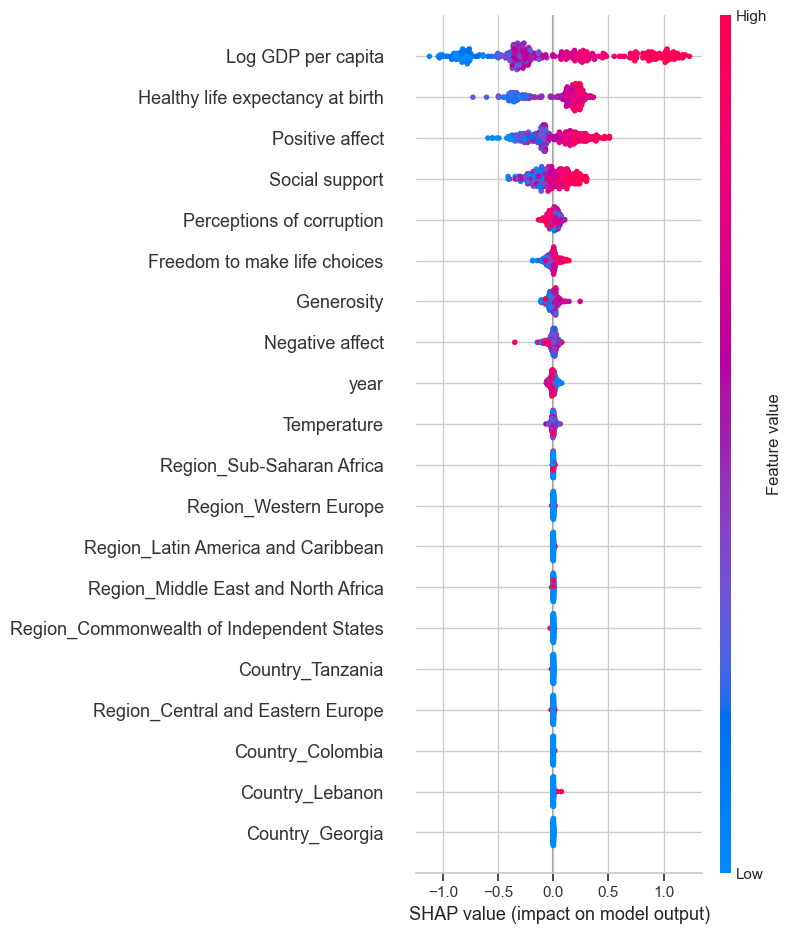

In [62]:

import shap

# Calcul des valeurs de SHAP pour Random Forest
explainer_rf = shap.TreeExplainer(rf_model)
shap_values_rf = explainer_rf.shap_values(X_test)

# Visualisation des valeurs de SHAP
shap.summary_plot(shap_values_rf, X_test)


# Exemple d'Utilisation de SHAP avec XGBoost

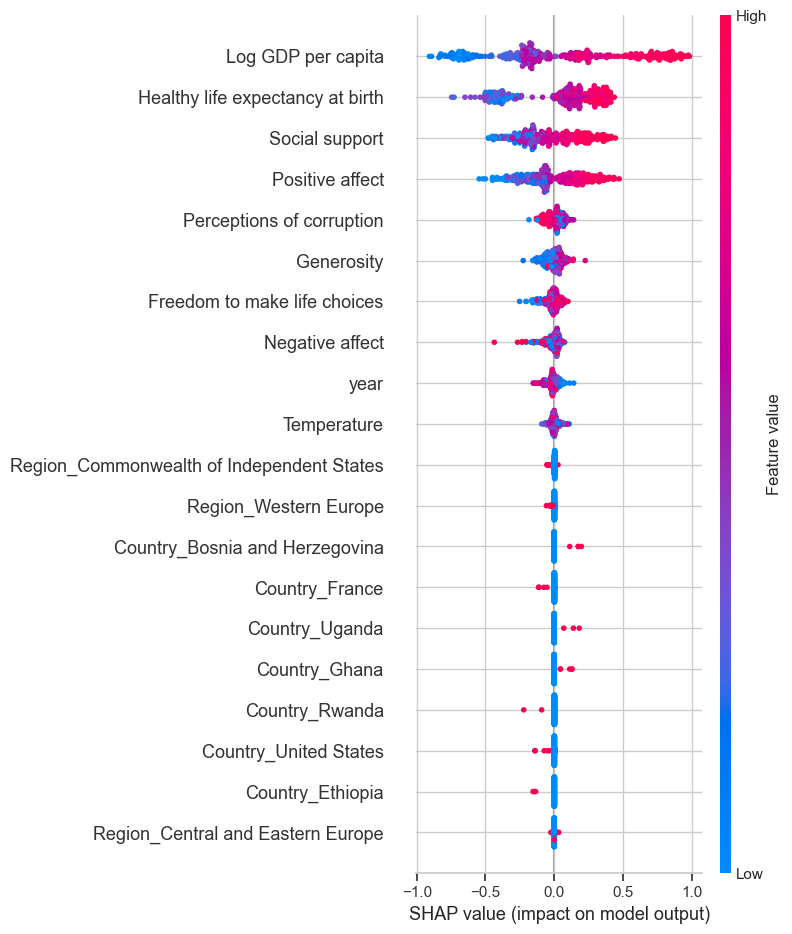

In [63]:
# Calcul des valeurs de SHAP pour XGBoost
explainer_xgb = shap.TreeExplainer(xgb_model)
shap_values_xgb = explainer_xgb.shap_values(X_test)

# Visualisation des valeurs de SHAP
shap.summary_plot(shap_values_xgb, X_test)


Fin